In [199]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [200]:
df = pd.read_csv('Housing_Project_Train.csv')
df_1 = pd.read_csv('Housing_Project_Train.csv') 
dft = pd.read_csv('Housing_Project_Test.csv')
pd.set_option('display.max_columns', 81)

#  Using pd.set_options to display max columns has a limit of 60. If there are more columns, then 'None' should be changed to the number of columns. 

In [201]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

    Observation: 

        Preliminary view shows a lot of null values in the dataset, variables that need to be abbreviated, and datas varying in a wide range. 

In [202]:
def info():
    a = [x for x in df if df[x].dtype == 'object']
    a_un = []
    a_nu = []
    for i in a:
        a_un.append(df[i].nunique())
        a_nu.append(df[i].isnull().sum())

    b = [x for x in df if df[x].dtype == 'int64']
    b_un = []
    b_nu = []
    for j in b:
        b_un.append(df[j].nunique())
        b_nu.append(df[j].isnull().sum())

    c = [x for x in df if df[x].dtype == 'float64']
    c_un = []
    c_nu = []
    for k in c:
        c_un.append(df[k].nunique())
        c_nu.append(df[k].isnull().sum())

    la, lb, lc, la_un, lb_un, lc_un, la_nu, lb_nu, lc_nu = len(a), len(b), len(c), len(a_un), len(b_un), len(c_un), len(a_nu), len(b_nu), len(c_nu)
    max_len = max(la, lb, lc, la_un, lb_un, lc_un, la_nu, lb_nu, lc_nu )

    if not max_len == la:
        a.extend(['']*(max_len-la))
    if not max_len == lb:
        b.extend(['']*(max_len-lb))
    if not max_len == lc:
        c.extend(['']*(max_len-lc))
    if not max_len == la_un:
        a_un.extend(['']*(max_len-la_un))
    if not max_len == lb_un:
        b_un.extend(['']*(max_len-lb_un))
    if not max_len == lc_un:
        c_un.extend(['']*(max_len-lc_un))
    if not max_len == la_nu:
        a_nu.extend(['']*(max_len-la_nu))
    if not max_len == lb_nu:
        b_nu.extend(['']*(max_len-lb_nu))
    if not max_len == lc_nu:
        c_nu.extend(['']*(max_len-lc_nu))

    #'Object': a, 'Unique': a_un, 'Null Count': a_nu, '|':'|', 'Integer': b, 'Unique': b_un, 'Null Count': b_nu, '|':'|', 'Float': c, 'Unique': c_un, 'Null Count': c_nu})
    e = pd.DataFrame({'Object Columns': a, 'Unique': a_un, 'Null Count': a_nu, '|':'|'})
    f = pd.DataFrame({'Integer Columns': b, 'Unique': b_un, 'Null Count': b_nu, '|':'|'})
    g = pd.DataFrame({'Float Columns': c, 'Unique': c_un, 'Null Count': c_nu})

    info = pd.concat([e, f, g], axis=1)
    
    return(info)

In [203]:
info()

Object Columns Unique Null Count  | Integer Columns Unique Null Count  |  \
0        MSZoning      5          0  |              Id   1168          0  |   
1          Street      2          0  |      MSSubClass     15          0  |   
2           Alley      2       1091  |         LotArea    892          0  |   
3        LotShape      4          0  |     OverallQual     10          0  |   
4     LandContour      4          0  |     OverallCond      9          0  |   
5       Utilities      1          0  |       YearBuilt    110          0  |   
6       LotConfig      5          0  |    YearRemodAdd     61          0  |   
7       LandSlope      3          0  |      BsmtFinSF1    551          0  |   
8    Neighborhood     25          0  |      BsmtFinSF2    122          0  |   
9      Condition1      9          0  |       BsmtUnfSF    681          0  |   
10     Condition2      8          0  |     TotalBsmtSF    636          0  |   
11       BldgType      5          0  |        1stFlrSF    669          0  |   
12     HouseStyle      8          0  |        2ndFlrSF    351          0  |   
13      RoofStyle      6          0  |    LowQualFinSF     21          0  |   
14       RoofMatl      8          0  |       GrLivArea    746          0  |   
15    Exterior1st     14          0  |    BsmtFullBath      4          0  |   
16    Exterior2nd     15          0  |    BsmtHalfBath      3          0  |   
17     MasVnrType      4          7  |        FullBath      4          0  |   
18      ExterQual      4          0  |        HalfBath      3          0  |   
19      ExterCond      5          0  |    BedroomAbvGr      8          0  |   
20     Foundation      6          0  |    KitchenAbvGr      4          0  |   
21       BsmtQual      4         30  |    TotRmsAbvGrd     12          0  |   
22       BsmtCond      4         30  |      Fireplaces      4          0  |   
23   BsmtExposure      4         31  |      GarageCars      5          0  |   
24   BsmtFinType1      6         30  |      GarageArea    392          0  |   
25   BsmtFinType2      6         31  |      WoodDeckSF    244          0  |   
26        Heating      6          0  |     OpenPorchSF    176          0  |   
27      HeatingQC      5          0  |   EnclosedPorch    106          0  |   
28     CentralAir      2          0  |       3SsnPorch     18          0  |   
29     Electrical      5          0  |     ScreenPorch     65          0  |   
30    KitchenQual      4          0  |        PoolArea      8          0  |   
31     Functional      7          0  |         MiscVal     20          0  |   
32    FireplaceQu      5        551  |          MoSold     12          0  |   
33     GarageType      6         64  |          YrSold      5          0  |   
34   GarageFinish      3         64  |       SalePrice    581          0  |   
35     GarageQual      5         64  |                                    |   
36     GarageCond      5         64  |                                    |   
37     PavedDrive      3          0  |                                    |   
38         PoolQC      3       1161  |                                    |   
39          Fence      4        931  |                                    |   
40    MiscFeature      4       1124  |                                    |   
41       SaleType      9          0  |                                    |   
42  SaleCondition      6          0  |                                    |   

   Float Columns Unique Null Count  
0    LotFrontage    106        214  
1     MasVnrArea    283          7  
2    GarageYrBlt     97         64  
3                                   
4                                   
5                                   
6                                   
7                                   
8                                   
9                                   
10                                  
11                                  
12                                  
13      

    Observation:
        
        - All the categorical columns are not under the Objects section.
        - There are a a high number of null values in 5 columns, and they'll be removed. 
        - Objects with missing entries will be substituted using mode. 

In [204]:
# Removing columns with high Null values and the 'Id' column. 
df_drop = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence','MiscFeature']
for i in df_drop: 
    df.drop(i, axis = 1, inplace = True)
df.shape

(1168, 75)

In [205]:
#To check for duplicate rows.
df.duplicated().sum()

0

## Visualization

<AxesSubplot:>

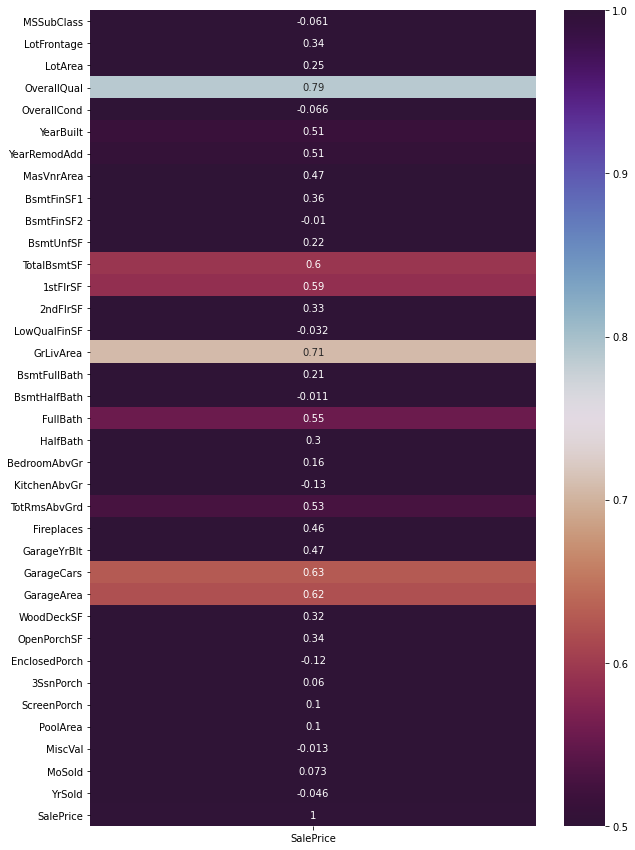

In [206]:
# Plotting a graph to show how all the variables correlate with the sale price; trying to filter the ones with most correlation
plt.figure(figsize = (10,15))
sb.heatmap(df.corr()[['SalePrice']], annot=True, vmin = 0.5, vmax = 1, cmap = 'twilight_shifted_r')

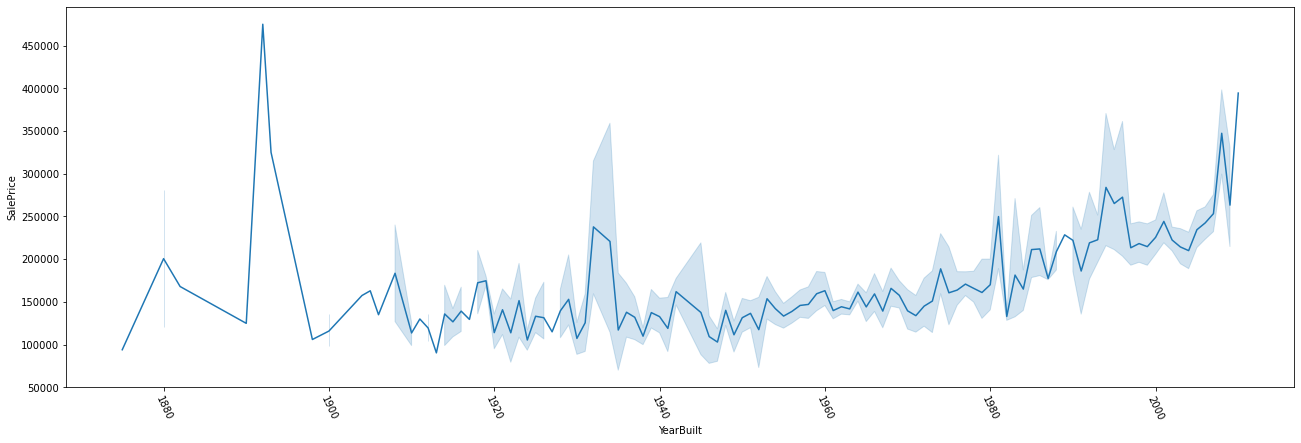

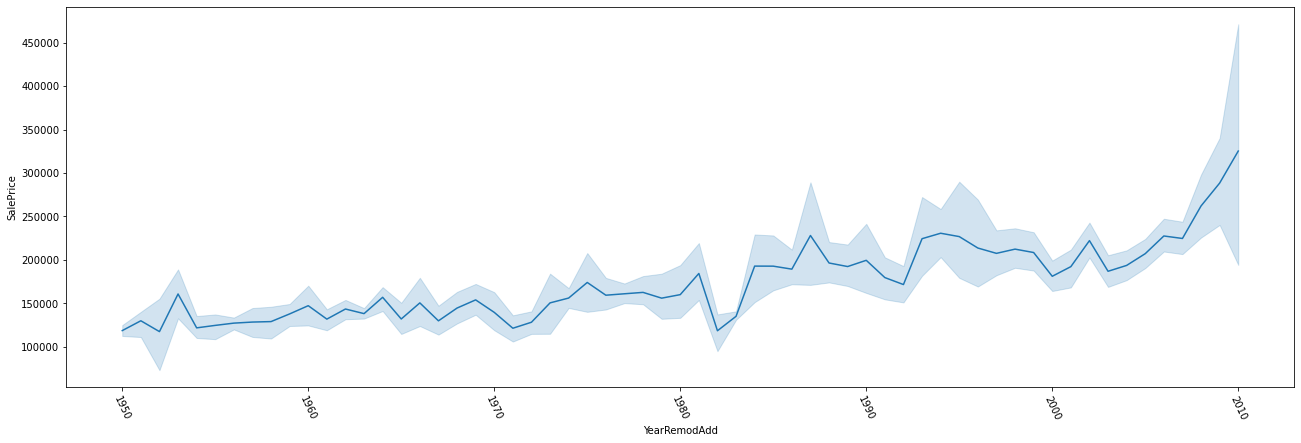

In [207]:
highcorr_cols_cont_1 = ('YearBuilt', 'YearRemodAdd')
for i in highcorr_cols_cont_1:
    plt.figure(figsize = (22,7))
    sb.lineplot(x = i, y = "SalePrice", data = df)
    plt.xticks(rotation = -65, fontsize = 10)
    plt.show()

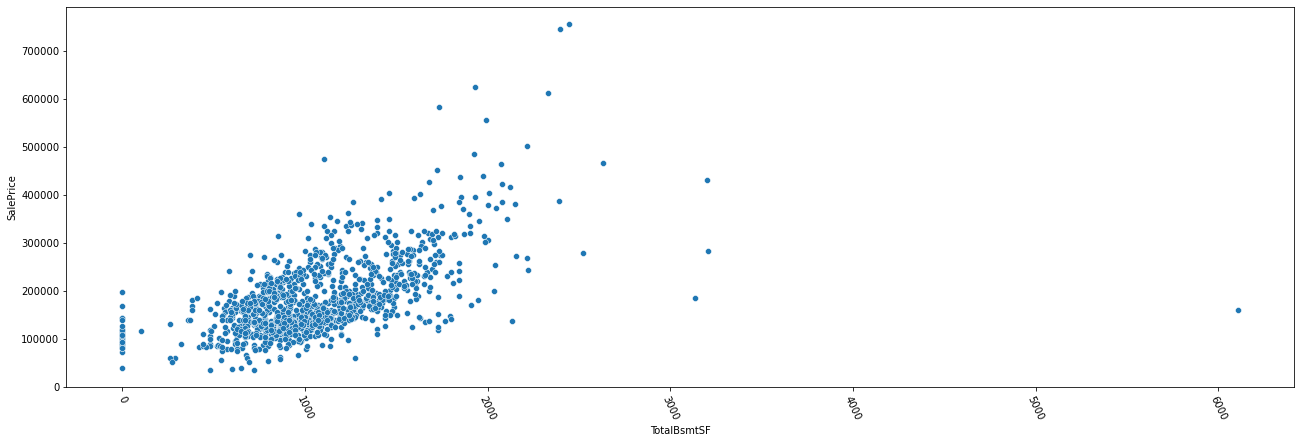

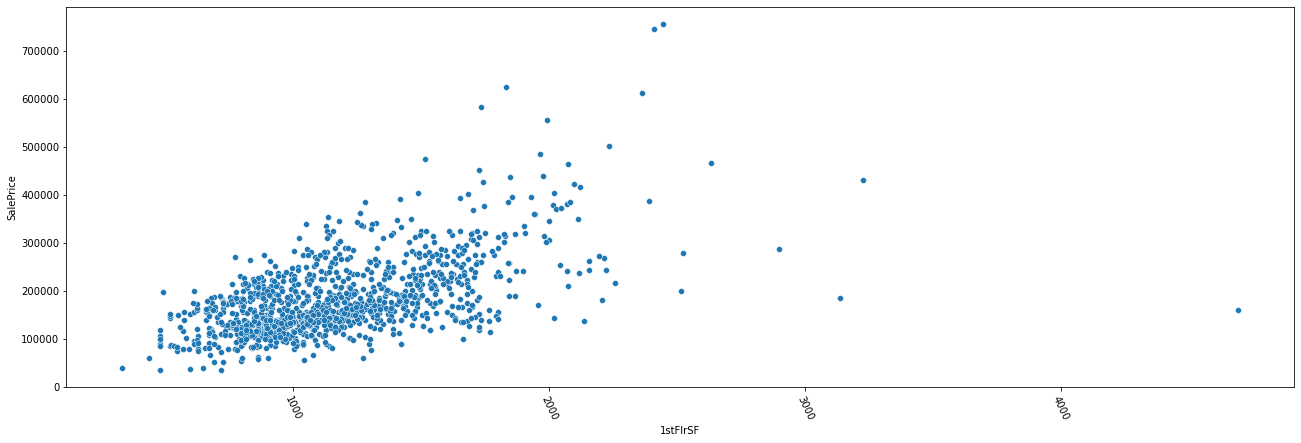

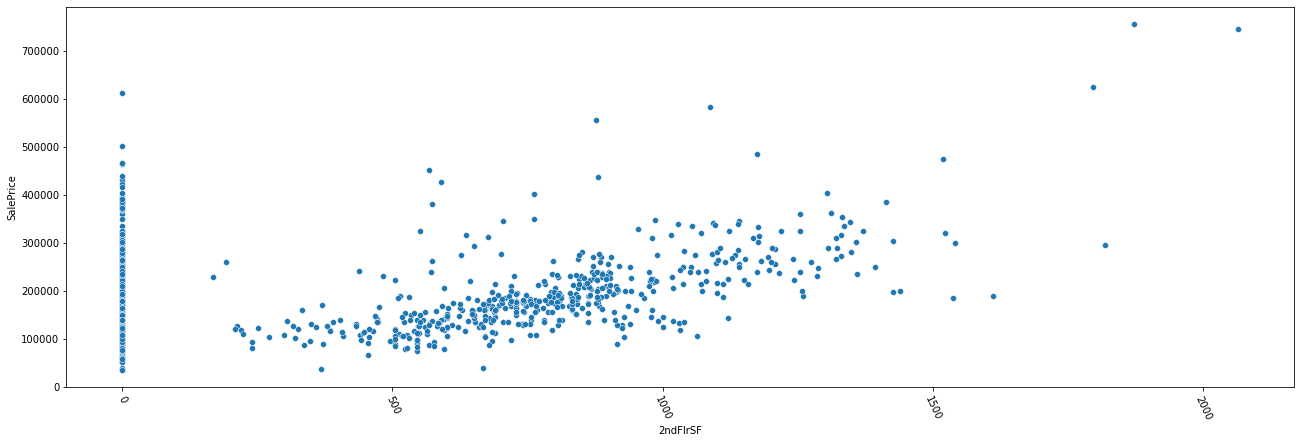

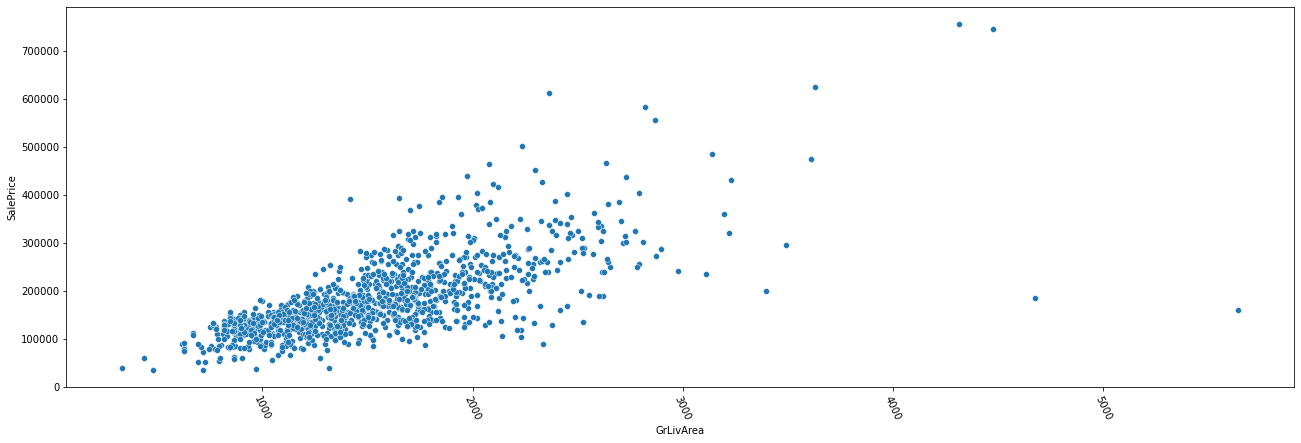

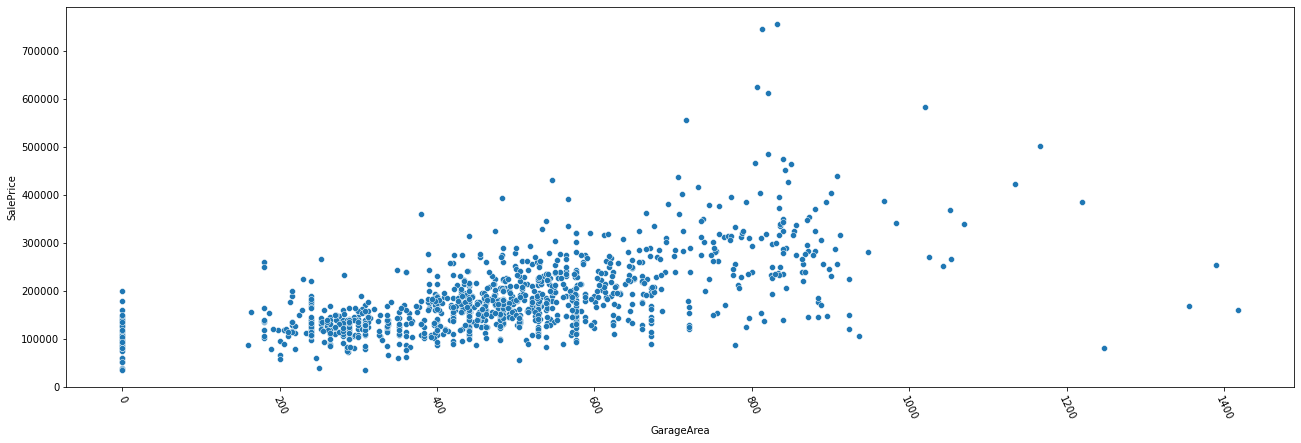

In [208]:
highcorr_cols_cont_2 = ('TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea')
for i in highcorr_cols_cont_2:
    plt.figure(figsize = (22,7))
    sb.scatterplot(x = i, y = "SalePrice", data = df)
    plt.xticks(rotation = -65, fontsize = 10)
    plt.show()

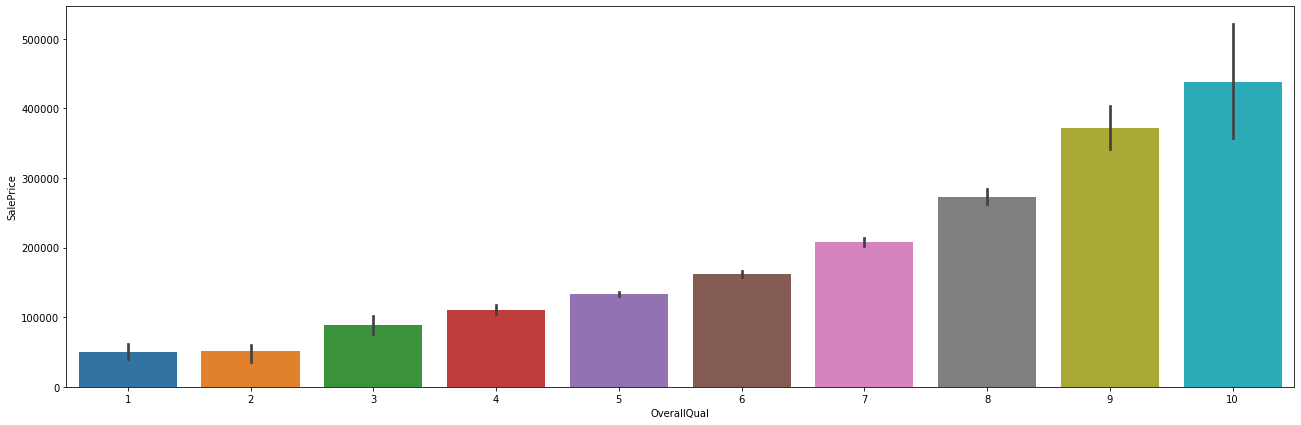

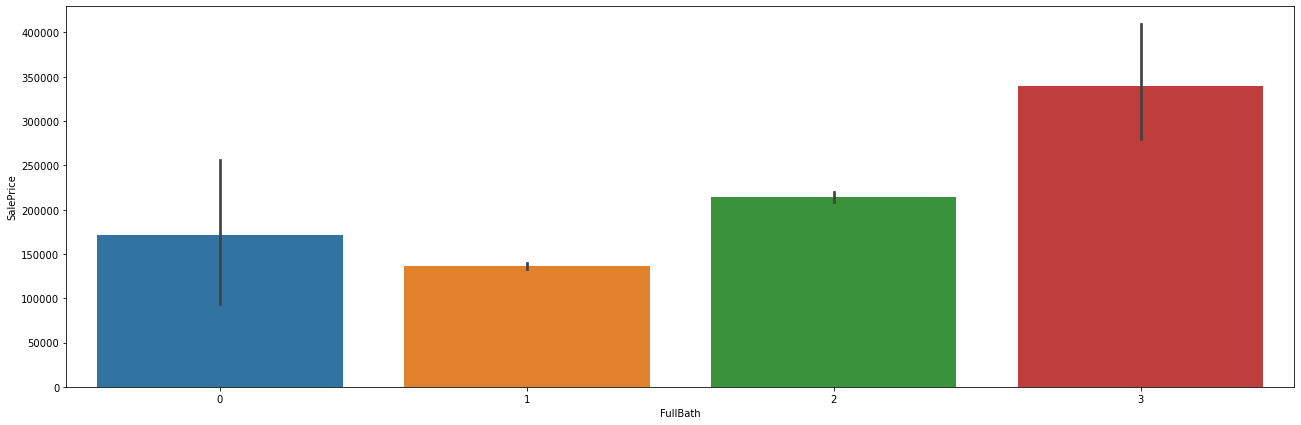

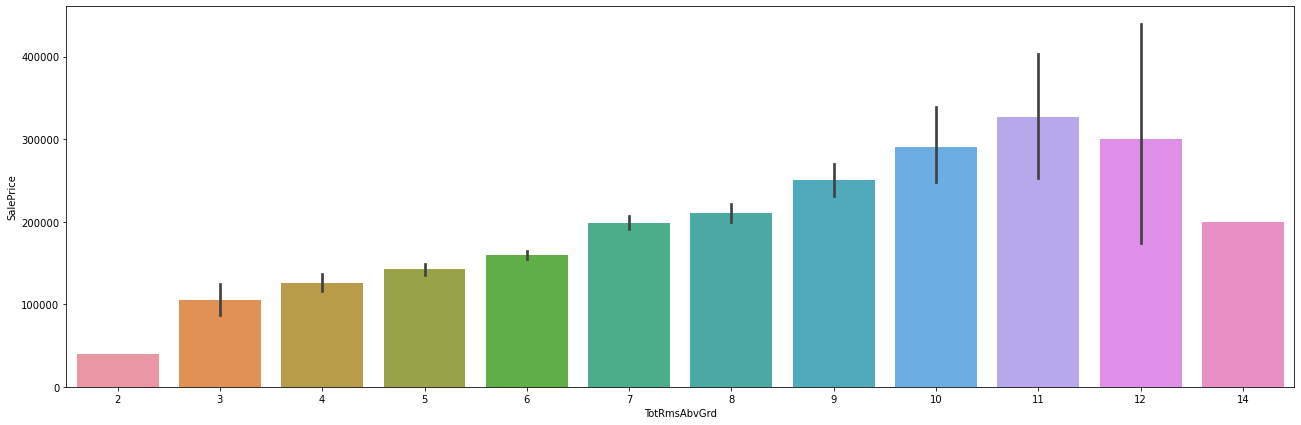

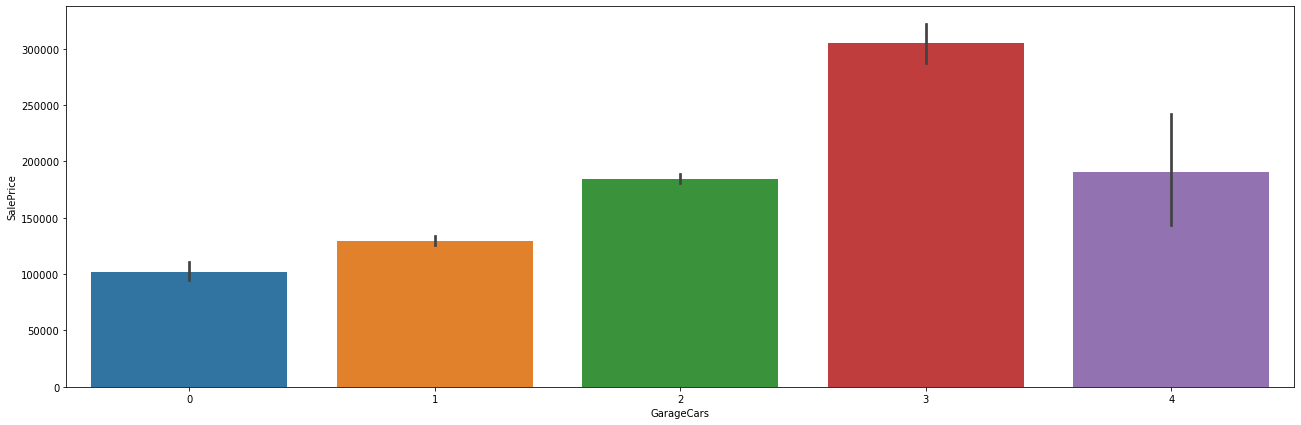

In [209]:
highcorr_cols_categ = ('OverallQual', 'FullBath', 'TotRmsAbvGrd', 'GarageCars')
for i in highcorr_cols_categ:
    plt.figure(figsize = (22,7))
    sb.barplot(x = i, y = 'SalePrice', data = df)
    plt.show()

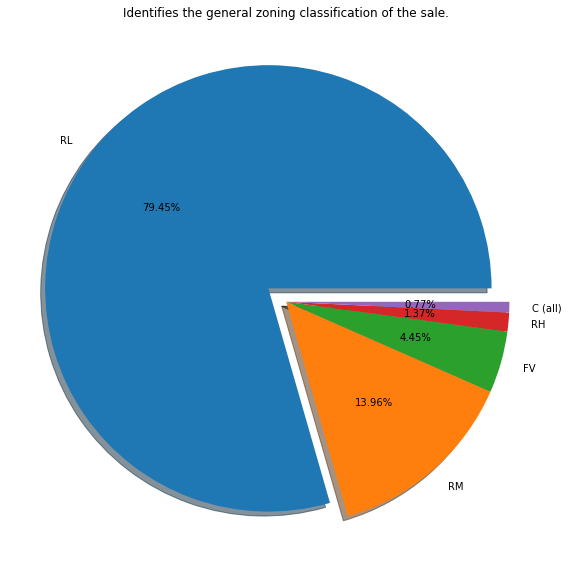

In [210]:
plt.figure(figsize = (10,15))
plt.title('Identifies the general zoning classification of the sale.')
pct = df['MSZoning'].value_counts().values / np.sum(df['MSZoning'].value_counts()) * 100

plt.pie(df['MSZoning'].value_counts().values, labels = df['MSZoning'].value_counts().index, autopct = '%1.2f%%', 
 explode = (pct == max(pct)) * 0.1, shadow = True);

    We can see that the higher number of people choose to live in a Residential Low Density area.

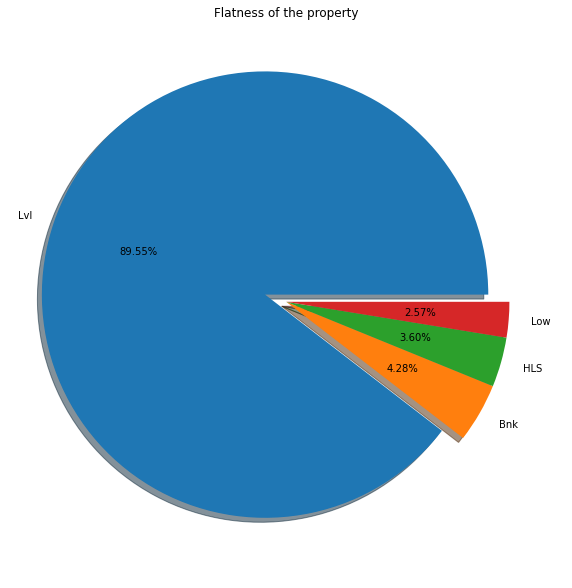

In [211]:
plt.figure(figsize = (10,15))
plt.title('Flatness of the property')
pct = df['LandContour'].value_counts().values / np.sum(df['LandContour'].value_counts()) * 100

plt.pie(df['LandContour'].value_counts().values, labels = df['LandContour'].value_counts().index, autopct = '%1.2f%%', 
 explode = (pct == max(pct)) * 0.1, shadow = True);

    89.55% of people prefer to live in a flat area.

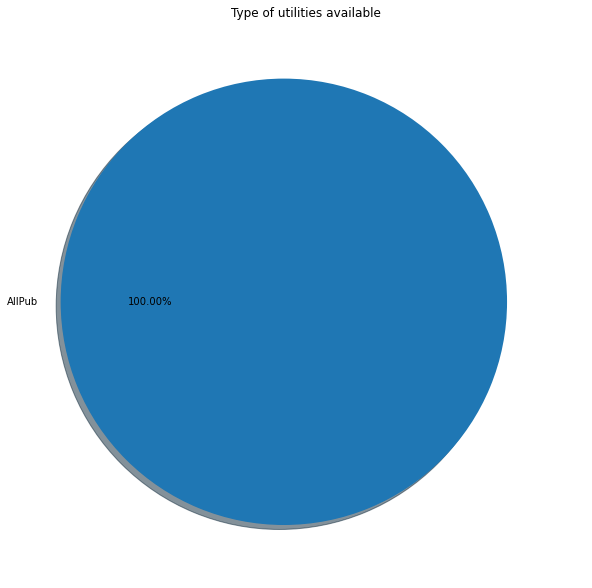

In [212]:
plt.figure(figsize = (10,15))
plt.title('Type of utilities available')
pct = df['Utilities'].value_counts().values / np.sum(df['Utilities'].value_counts()) * 100

plt.pie(df['Utilities'].value_counts().values, labels = df['Utilities'].value_counts().index, autopct = '%1.2f%%', 
 explode = (pct == max(pct)) * 0.1, shadow = True);

    All the houses we've listed in have all public utilities available. 

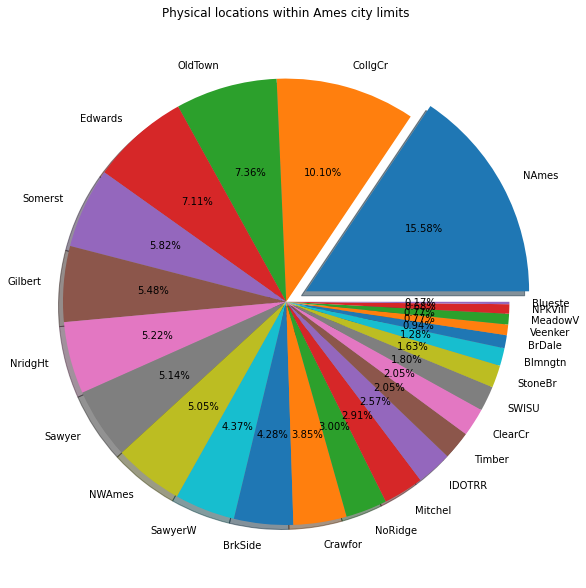

In [213]:
plt.figure(figsize = (10,15))
plt.title('Physical locations within Ames city limits')
pct = df['Neighborhood'].value_counts().values / np.sum(df['Neighborhood'].value_counts()) * 100

plt.pie(df['Neighborhood'].value_counts().values, labels = df['Neighborhood'].value_counts().index, autopct = '%1.2f%%', 
 explode = (pct == max(pct)) * 0.1, shadow = True);

    Highest number of people prefer Northwest Ames, followed by Old Town, Edwards, Somerset, etc. 

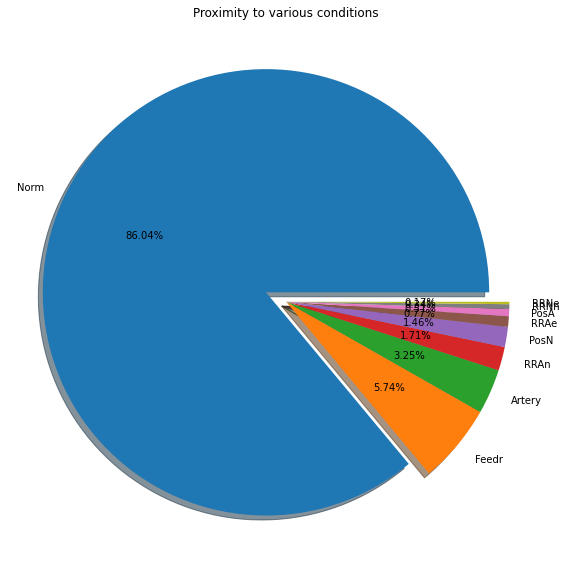

In [214]:
plt.figure(figsize = (10,15))
plt.title('Proximity to various conditions')
pct = df['Condition1'].value_counts().values / np.sum(df['Condition1'].value_counts()) * 100

plt.pie(df['Condition1'].value_counts().values, labels = df['Condition1'].value_counts().index, autopct = '%1.2f%%', 
 explode = (pct == max(pct)) * 0.1, shadow = True);

    Most of the available facilities in proximity are Normal. 

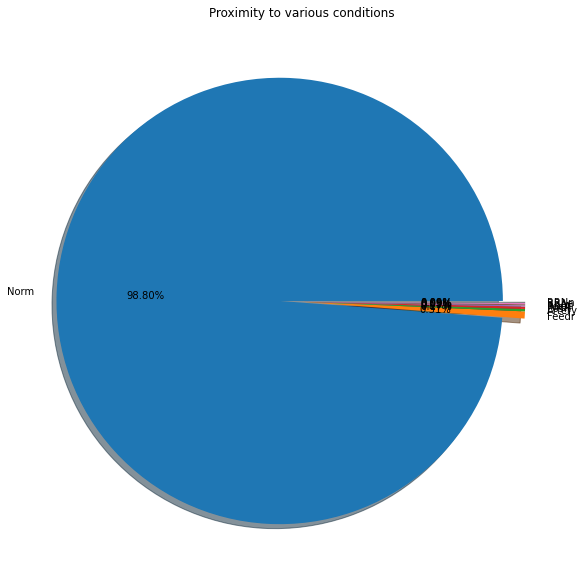

In [215]:
plt.figure(figsize = (10,15))
plt.title('Proximity to various conditions')
pct = df['Condition2'].value_counts().values / np.sum(df['Condition2'].value_counts()) * 100

plt.pie(df['Condition2'].value_counts().values, labels = df['Condition2'].value_counts().index, autopct = '%1.2f%%', 
 explode = (pct == max(pct)) * 0.1, shadow = True);

    Most of the available facilities in proximity are Normal. 

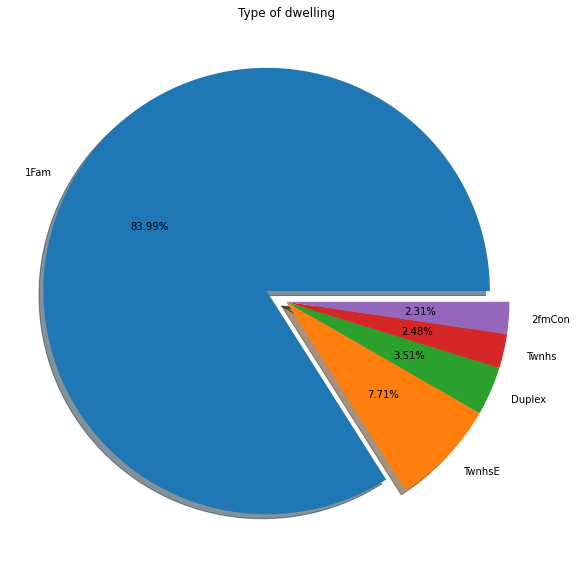

In [216]:
plt.figure(figsize = (10,15))
plt.title('Type of dwelling')
pct = df['BldgType'].value_counts().values / np.sum(df['BldgType'].value_counts()) * 100

plt.pie(df['BldgType'].value_counts().values, labels = df['BldgType'].value_counts().index, autopct = '%1.2f%%', 
 explode = (pct == max(pct)) * 0.1, shadow = True);

    Most of the houses sold are Single-family Detached houses.

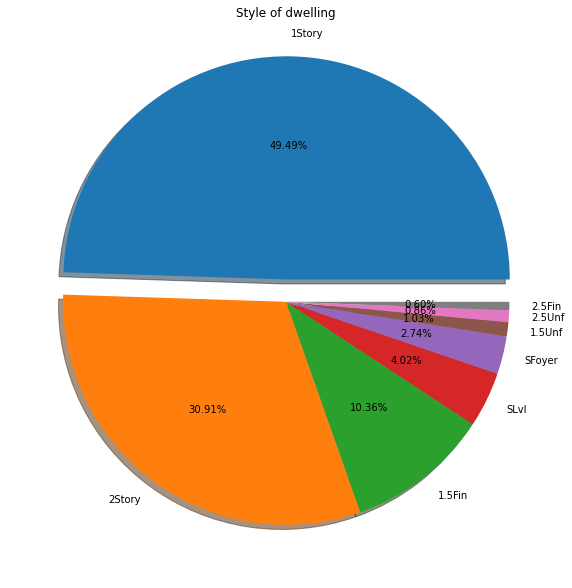

In [217]:
plt.figure(figsize = (10,15))
plt.title('Style of dwelling')
pct = df['HouseStyle'].value_counts().values / np.sum(df['HouseStyle'].value_counts()) * 100

plt.pie(df['HouseStyle'].value_counts().values, labels = df['HouseStyle'].value_counts().index, autopct = '%1.2f%%', 
 explode = (pct == max(pct)) * 0.1, shadow = True);

    About half of the houses sold are 1Story, followed by 2Story.

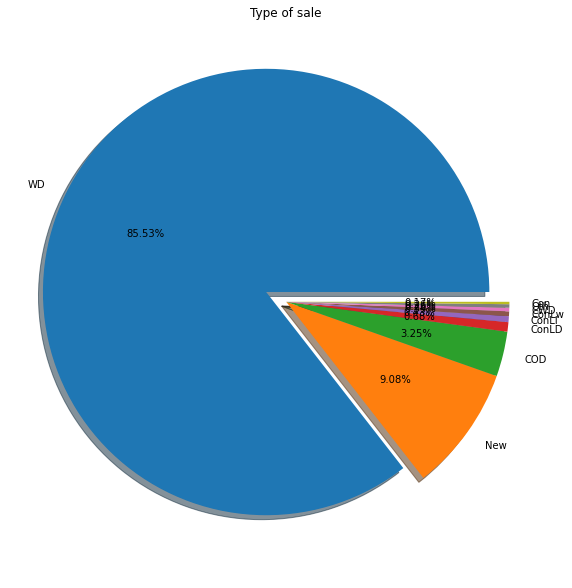

In [218]:
plt.figure(figsize = (10,15))
plt.title('Type of sale')
pct = df['SaleType'].value_counts().values / np.sum(df['SaleType'].value_counts()) * 100

plt.pie(df['SaleType'].value_counts().values, labels = df['SaleType'].value_counts().index, autopct = '%1.2f%%', 
 explode = (pct == max(pct)) * 0.1, shadow = True);

    Most of the house sales are Warranty Deed - Conventional

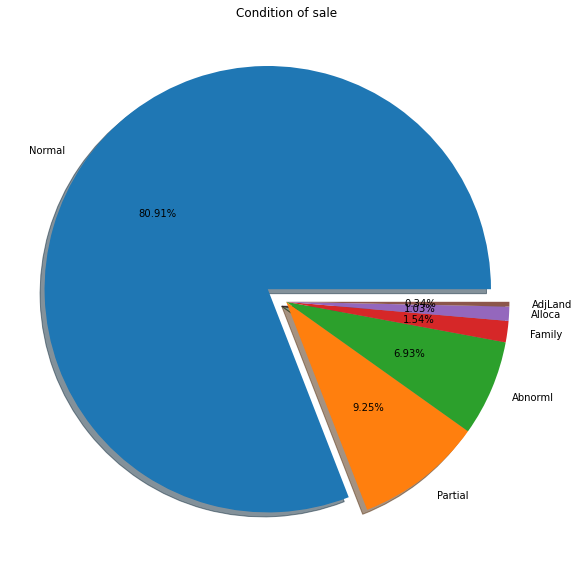

In [219]:
plt.figure(figsize = (10,15))
plt.title('Condition of sale')
pct = df['SaleCondition'].value_counts().values / np.sum(df['SaleCondition'].value_counts()) * 100

plt.pie(df['SaleCondition'].value_counts().values, labels = df['SaleCondition'].value_counts().index, autopct = '%1.2f%%', 
 explode = (pct == max(pct)) * 0.1, shadow = True);

    Most of the sales are Normal

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

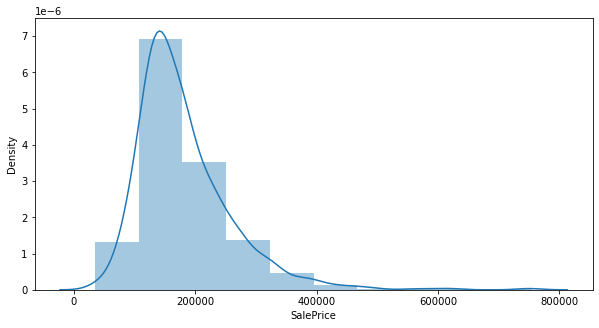

In [220]:
plt.figure(figsize = (10,5))
sb.distplot(df['SalePrice'], bins = 10, kde = True)

    Most of the houses sold are in 200,000 range. 

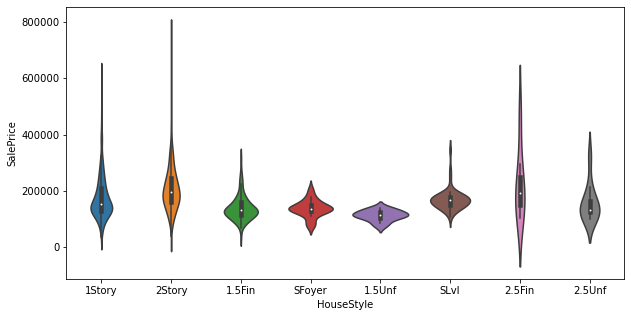

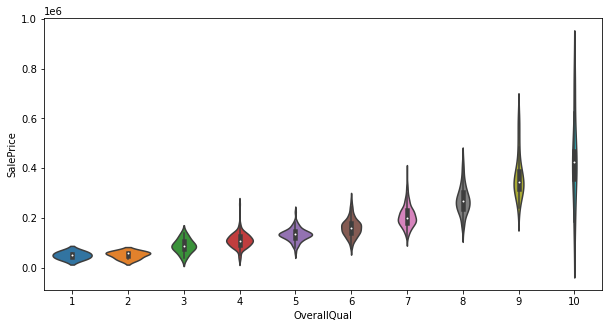

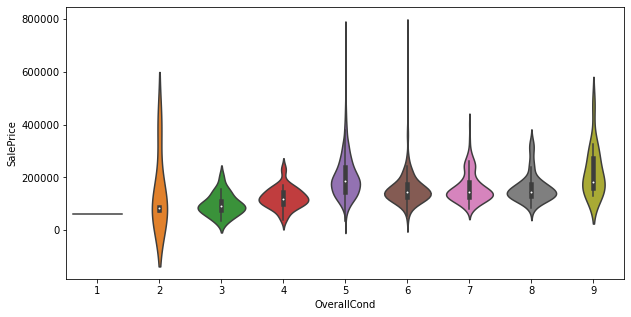

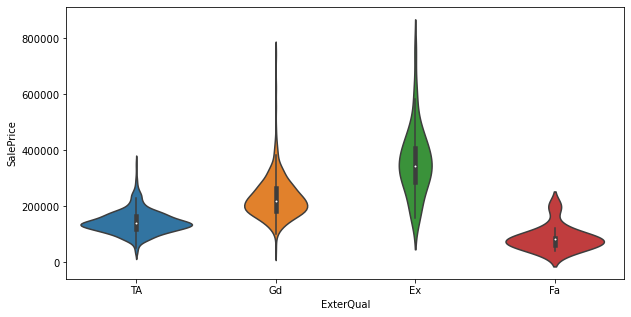

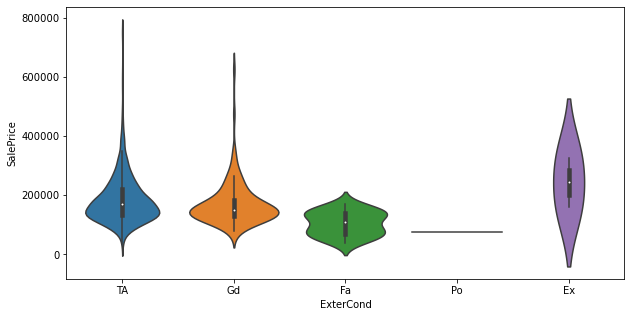

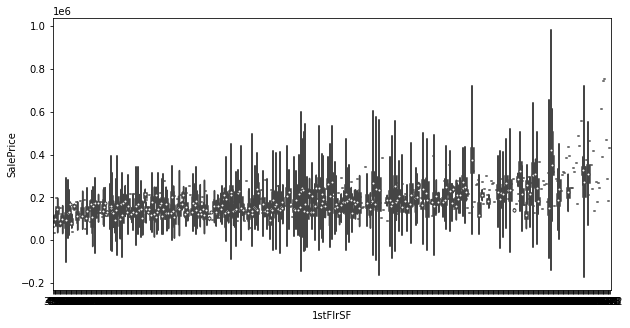

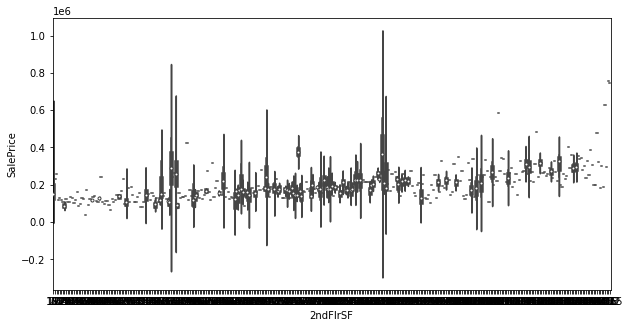

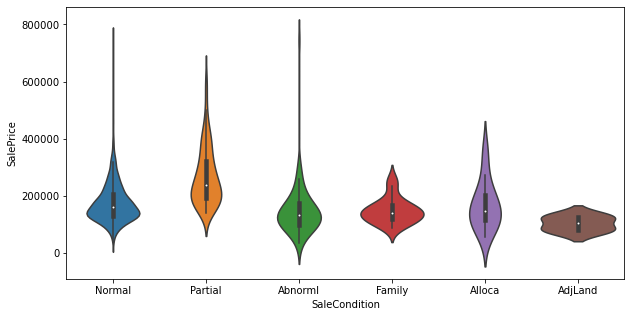

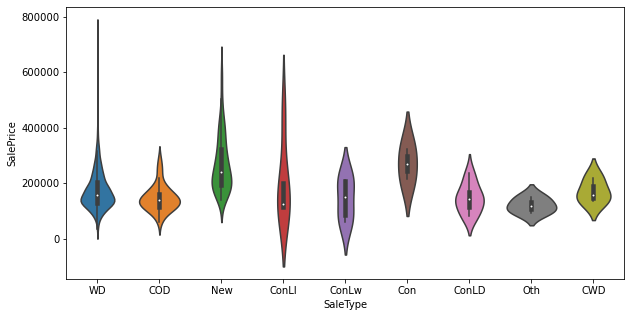

In [221]:
plot = ('HouseStyle', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', '1stFlrSF', '2ndFlrSF', 'SaleCondition', 'SaleType')
for i in plot:
    plt.figure(figsize = (10,5))
    sb.violinplot(x = df[i], y = df["SalePrice"])

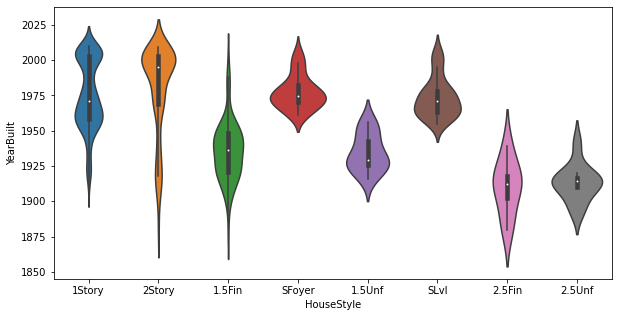

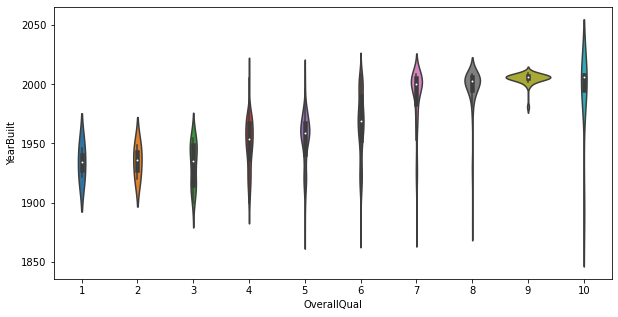

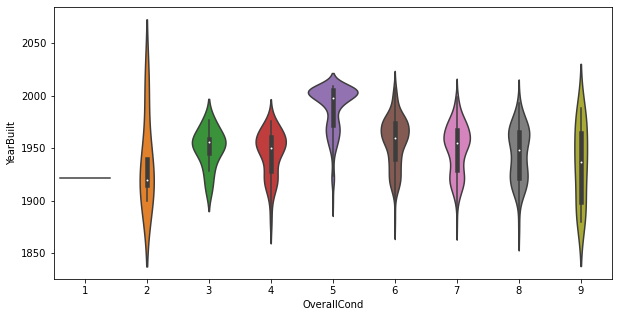

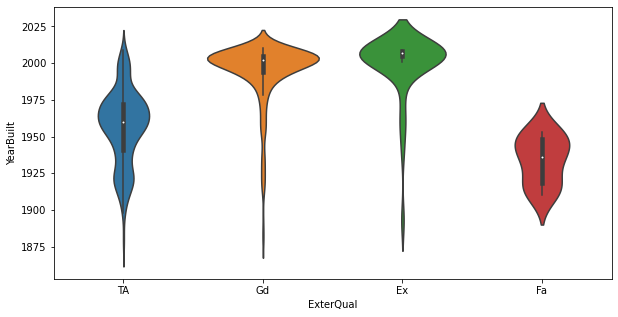

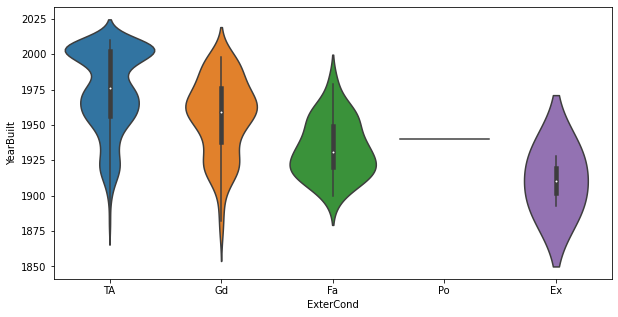

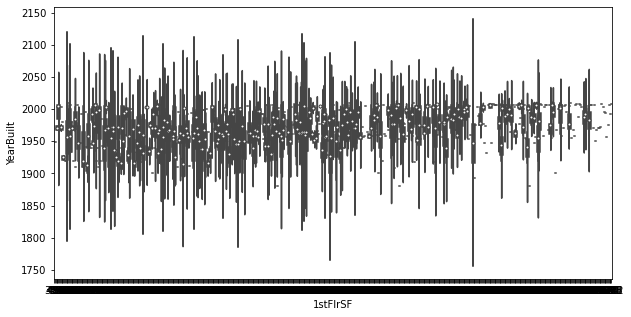

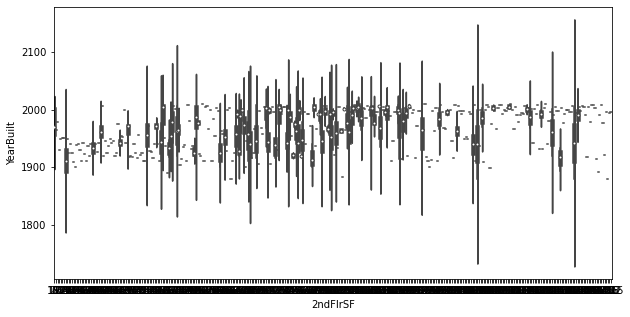

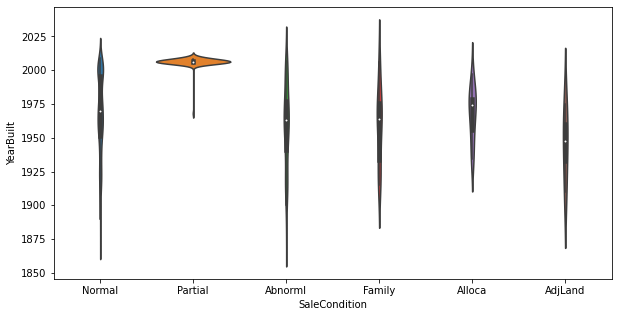

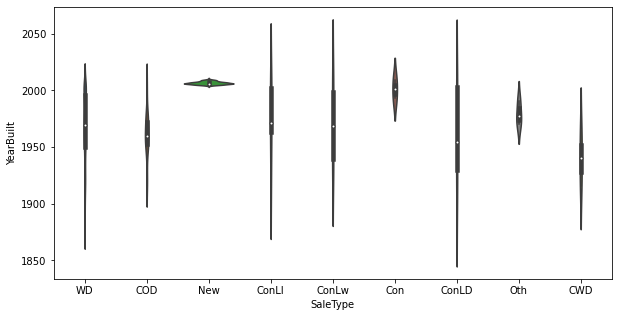

In [222]:
plot = ('HouseStyle', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', '1stFlrSF', '2ndFlrSF', 'SaleCondition', 'SaleType')
for i in plot:
    plt.figure(figsize = (10,5))
    sb.violinplot(x = df[i], y = df["YearBuilt"])

<AxesSubplot:xlabel='YearBuilt', ylabel='YearRemodAdd'>

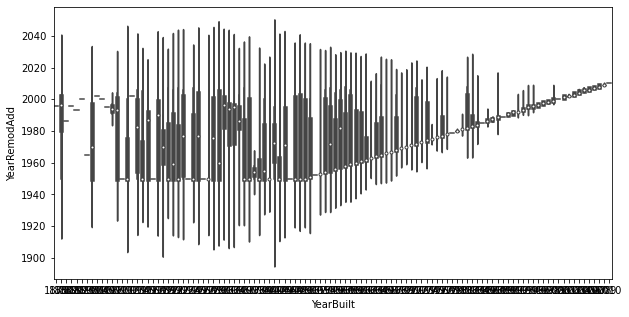

In [223]:
plt.figure(figsize = (10,5))
sb.violinplot(x = df["YearBuilt"], y = df["YearRemodAdd"])

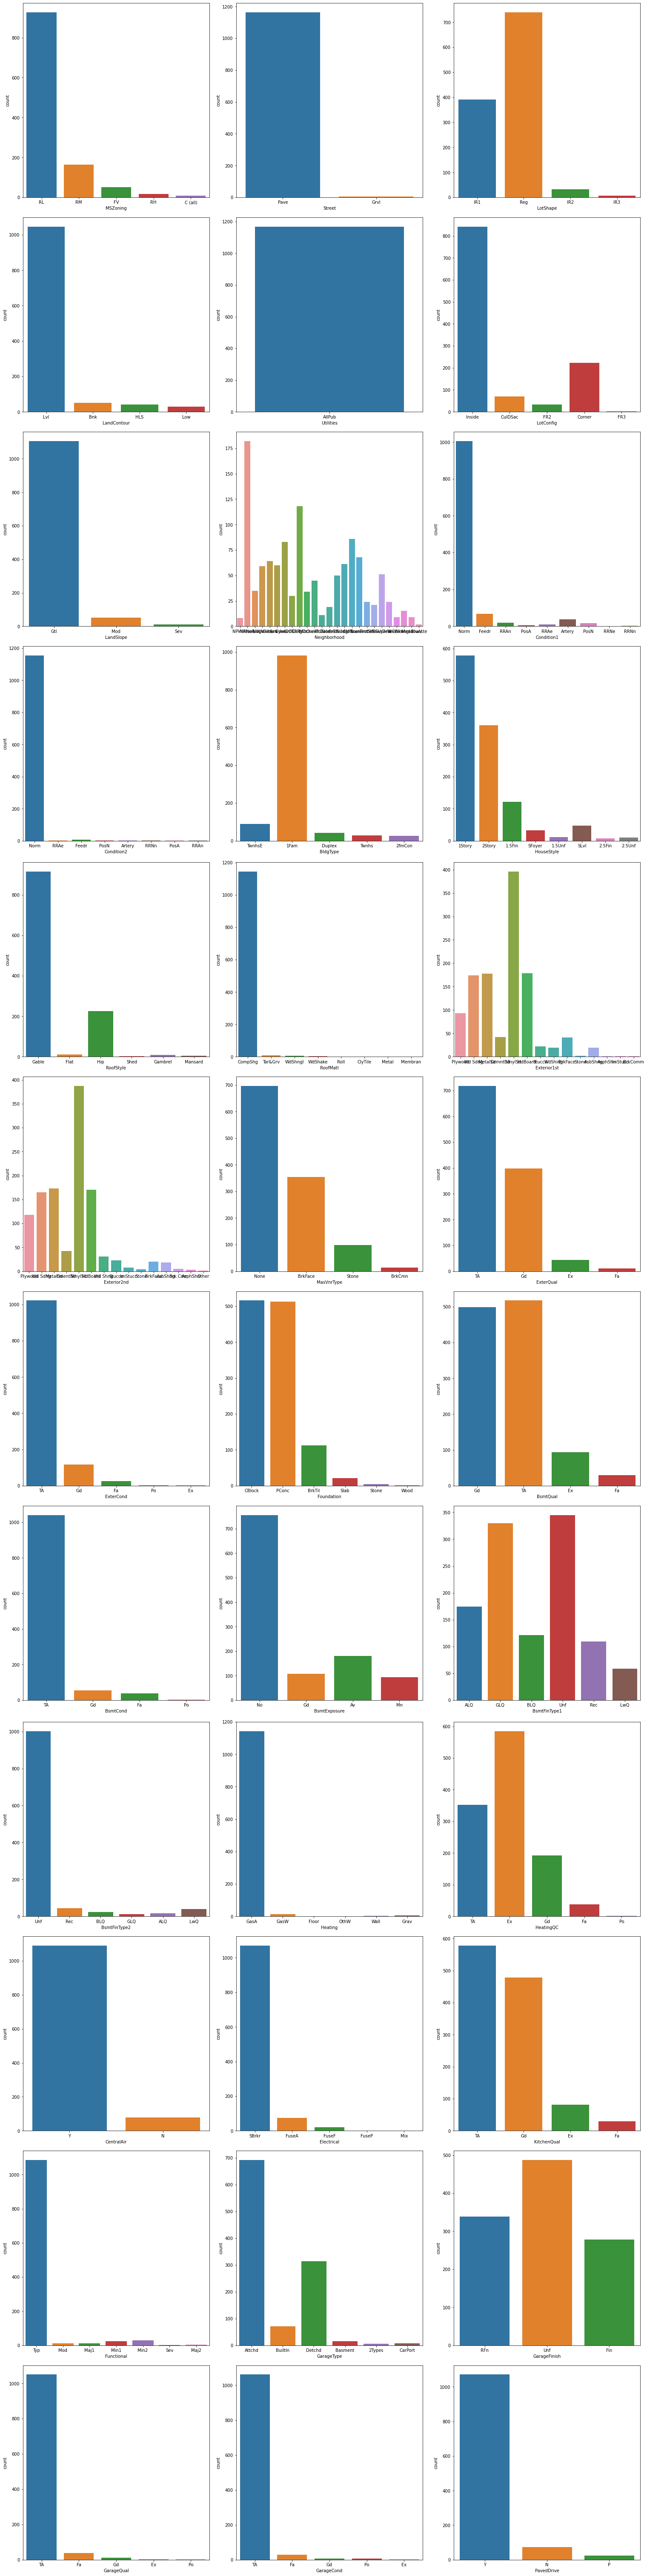

In [224]:
# Plotting categorical columns
# Printing catplots as subplots
categ_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
             'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
             'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
             'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']
num_plots = len(categ_cols)
total_cols = 3
total_rows = num_plots//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(categ_cols):
    row = i//total_cols
    pos = i % total_cols
    plot = sb.countplot(x=var, data=df, ax=axs[row][pos])

## Handling Null values

In [225]:
# Imputing the null values
float_col_with_null = [x for x in df if df[x].dtype == 'float64' and df[x].isnull().sum()]
float_col_with_null

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

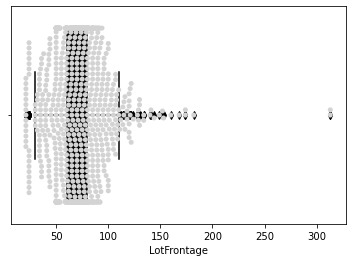

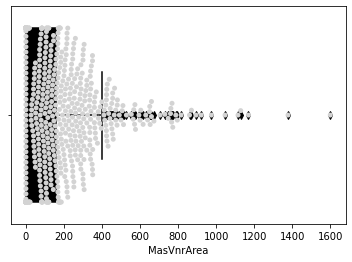

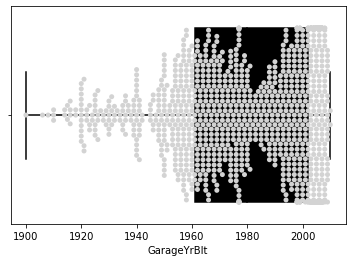

In [226]:
# Checking the outliers in the 3 columns listed above to decide if mean or median should be used to substitute NaN
for i in float_col_with_null:
    ax = sb.boxplot(df[i], data = df, color = 'black')
    ax = sb.swarmplot(df[i], data = df, color = 'lightgray')
    plt.show()

In [227]:
# Since all three columns has skewness, I'm opting to use median to fill in the null values for these columns. 
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [228]:
object_col_with_null = [x for x in df if df[x].dtype == 'object' and df[x].isnull().sum()]
object_col_with_null

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [229]:
# Checked and confirmed that all the columns listed above are categorical & hence using mode
for i in object_col_with_null:
    df[i] = df[i].fillna(df[i].mode()[0])

In [230]:
info()

Object Columns Unique Null Count  | Integer Columns Unique Null Count  |  \
0        MSZoning      5          0  |      MSSubClass     15          0  |   
1          Street      2          0  |         LotArea    892          0  |   
2        LotShape      4          0  |     OverallQual     10          0  |   
3     LandContour      4          0  |     OverallCond      9          0  |   
4       Utilities      1          0  |       YearBuilt    110          0  |   
5       LotConfig      5          0  |    YearRemodAdd     61          0  |   
6       LandSlope      3          0  |      BsmtFinSF1    551          0  |   
7    Neighborhood     25          0  |      BsmtFinSF2    122          0  |   
8      Condition1      9          0  |       BsmtUnfSF    681          0  |   
9      Condition2      8          0  |     TotalBsmtSF    636          0  |   
10       BldgType      5          0  |        1stFlrSF    669          0  |   
11     HouseStyle      8          0  |        2ndFlrSF    351          0  |   
12      RoofStyle      6          0  |    LowQualFinSF     21          0  |   
13       RoofMatl      8          0  |       GrLivArea    746          0  |   
14    Exterior1st     14          0  |    BsmtFullBath      4          0  |   
15    Exterior2nd     15          0  |    BsmtHalfBath      3          0  |   
16     MasVnrType      4          0  |        FullBath      4          0  |   
17      ExterQual      4          0  |        HalfBath      3          0  |   
18      ExterCond      5          0  |    BedroomAbvGr      8          0  |   
19     Foundation      6          0  |    KitchenAbvGr      4          0  |   
20       BsmtQual      4          0  |    TotRmsAbvGrd     12          0  |   
21       BsmtCond      4          0  |      Fireplaces      4          0  |   
22   BsmtExposure      4          0  |      GarageCars      5          0  |   
23   BsmtFinType1      6          0  |      GarageArea    392          0  |   
24   BsmtFinType2      6          0  |      WoodDeckSF    244          0  |   
25        Heating      6          0  |     OpenPorchSF    176          0  |   
26      HeatingQC      5          0  |   EnclosedPorch    106          0  |   
27     CentralAir      2          0  |       3SsnPorch     18          0  |   
28     Electrical      5          0  |     ScreenPorch     65          0  |   
29    KitchenQual      4          0  |        PoolArea      8          0  |   
30     Functional      7          0  |         MiscVal     20          0  |   
31     GarageType      6          0  |          MoSold     12          0  |   
32   GarageFinish      3          0  |          YrSold      5          0  |   
33     GarageQual      5          0  |       SalePrice    581          0  |   
34     GarageCond      5          0  |                                    |   
35     PavedDrive      3          0  |                                    |   
36       SaleType      9          0  |                                    |   
37  SaleCondition      6          0  |                                    |   

   Float Columns Unique Null Count  
0    LotFrontage    106          0  
1     MasVnrArea    283          0  
2    GarageYrBlt     97          0  
3                                   
4                                   
5                                   
6                                   
7                                   
8                                   
9                                   
10                                  
11                                  
12                                  
13                                  
14                                  
15                                  
16                                  
17                                  
18                                  
19                                  
20                                  
21                                  
22                                  
23                               

## Summary

In [231]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.807363   10484.749144     6.104452     5.595890   
std      41.940650    22.440317    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.000000    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   101.696918   444.726027    46.647260   
std      30.145255     20.785185   182.218483   462.664785   163.520016   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1525.066781      0.425514      0.055651     1.562500     0.388699   
std     528.042957      0.521615      0.236699     0.551882     0.504929   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1143.250000      0.000000      0.000000     1.000000     0.000000   
50%    1468.500000      0.000000      0.000000     2.000000     0.000000   
75%    1795.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean       2.884418      1.045377      6.542808     0.617295  1978.292808   
std        0.817229      0.216292      1.598484     0.650575    24.202053   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000   

<AxesSubplot:>

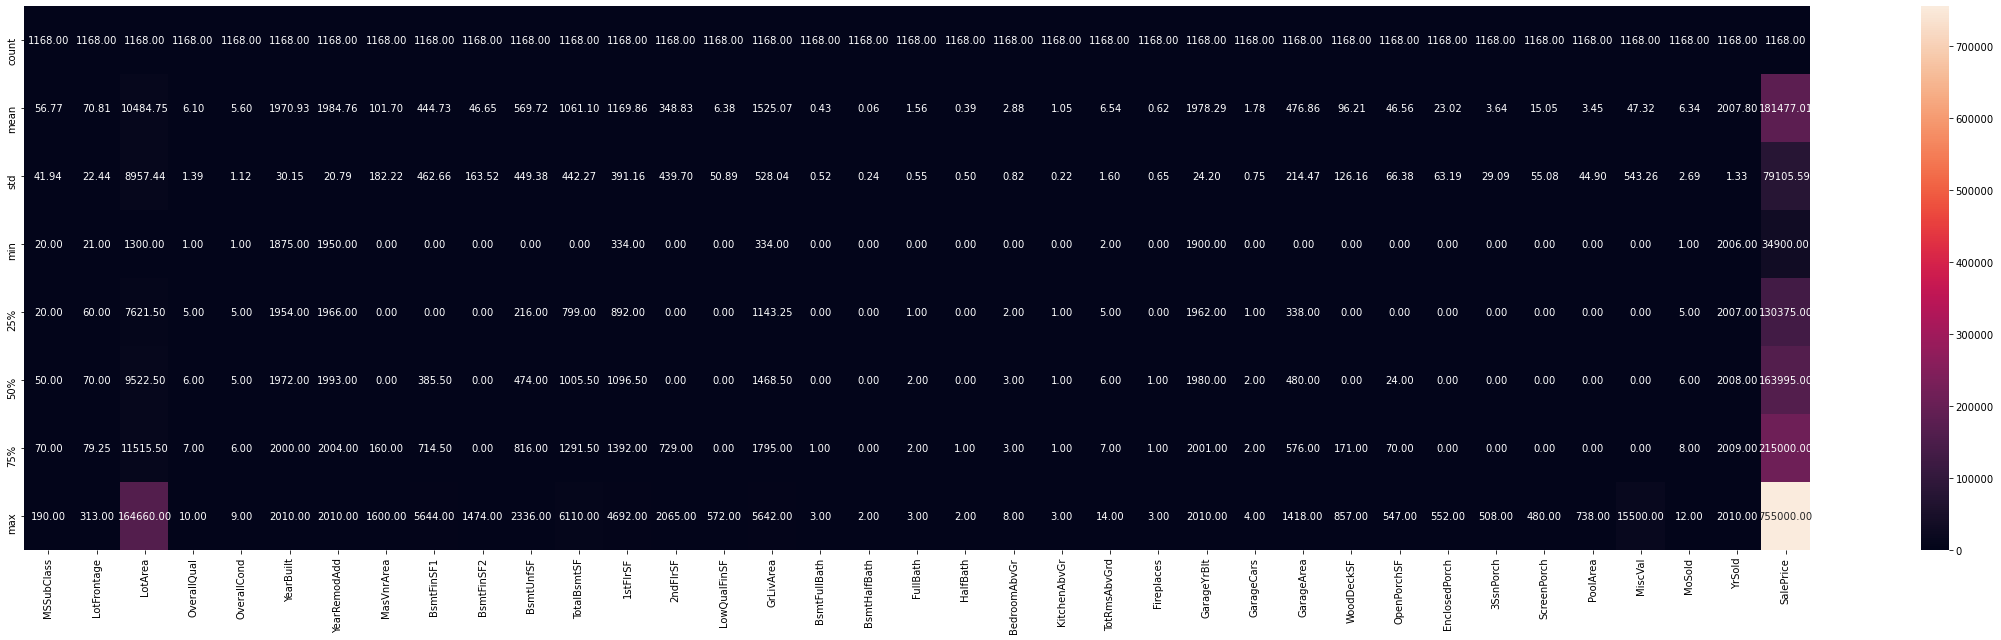

In [232]:
plt.figure(figsize = (40,10))
sb.heatmap(df.describe(), annot = True, fmt = '0.2f')

In [233]:
df.describe(include = [object]).T

count unique      top  freq
MSZoning       1168      5       RL   928
Street         1168      2     Pave  1164
LotShape       1168      4      Reg   740
LandContour    1168      4      Lvl  1046
Utilities      1168      1   AllPub  1168
LotConfig      1168      5   Inside   842
LandSlope      1168      3      Gtl  1105
Neighborhood   1168     25    NAmes   182
Condition1     1168      9     Norm  1005
Condition2     1168      8     Norm  1154
BldgType       1168      5     1Fam   981
HouseStyle     1168      8   1Story   578
RoofStyle      1168      6    Gable   915
RoofMatl       1168      8  CompShg  1144
Exterior1st    1168     14  VinylSd   396
Exterior2nd    1168     15  VinylSd   387
MasVnrType     1168      4     None   703
ExterQual      1168      4       TA   717
ExterCond      1168      5       TA  1022
Foundation     1168      6   CBlock   516
BsmtQual       1168      4       TA   547
BsmtCond       1168      4       TA  1071
BsmtExposure   1168      4       No   787
BsmtFinType1   1168      6      Unf   375
BsmtFinType2   1168      6      Unf  1033
Heating        1168      6     GasA  1143
HeatingQC      1168      5       Ex   585
CentralAir     1168      2        Y  1090
Electrical     1168      5    SBrkr  1070
KitchenQual    1168      4       TA   578
Functional     1168      7      Typ  1085
GarageType     1168      6   Attchd   755
GarageFinish   1168      3      Unf   551
GarageQual     1168      5       TA  1114
GarageCond     1168      5       TA  1125
PavedDrive     1168      3        Y  1071
SaleType       1168      9       WD   999
SaleCondition  1168      6   Normal   945

## Correlation

<AxesSubplot:>

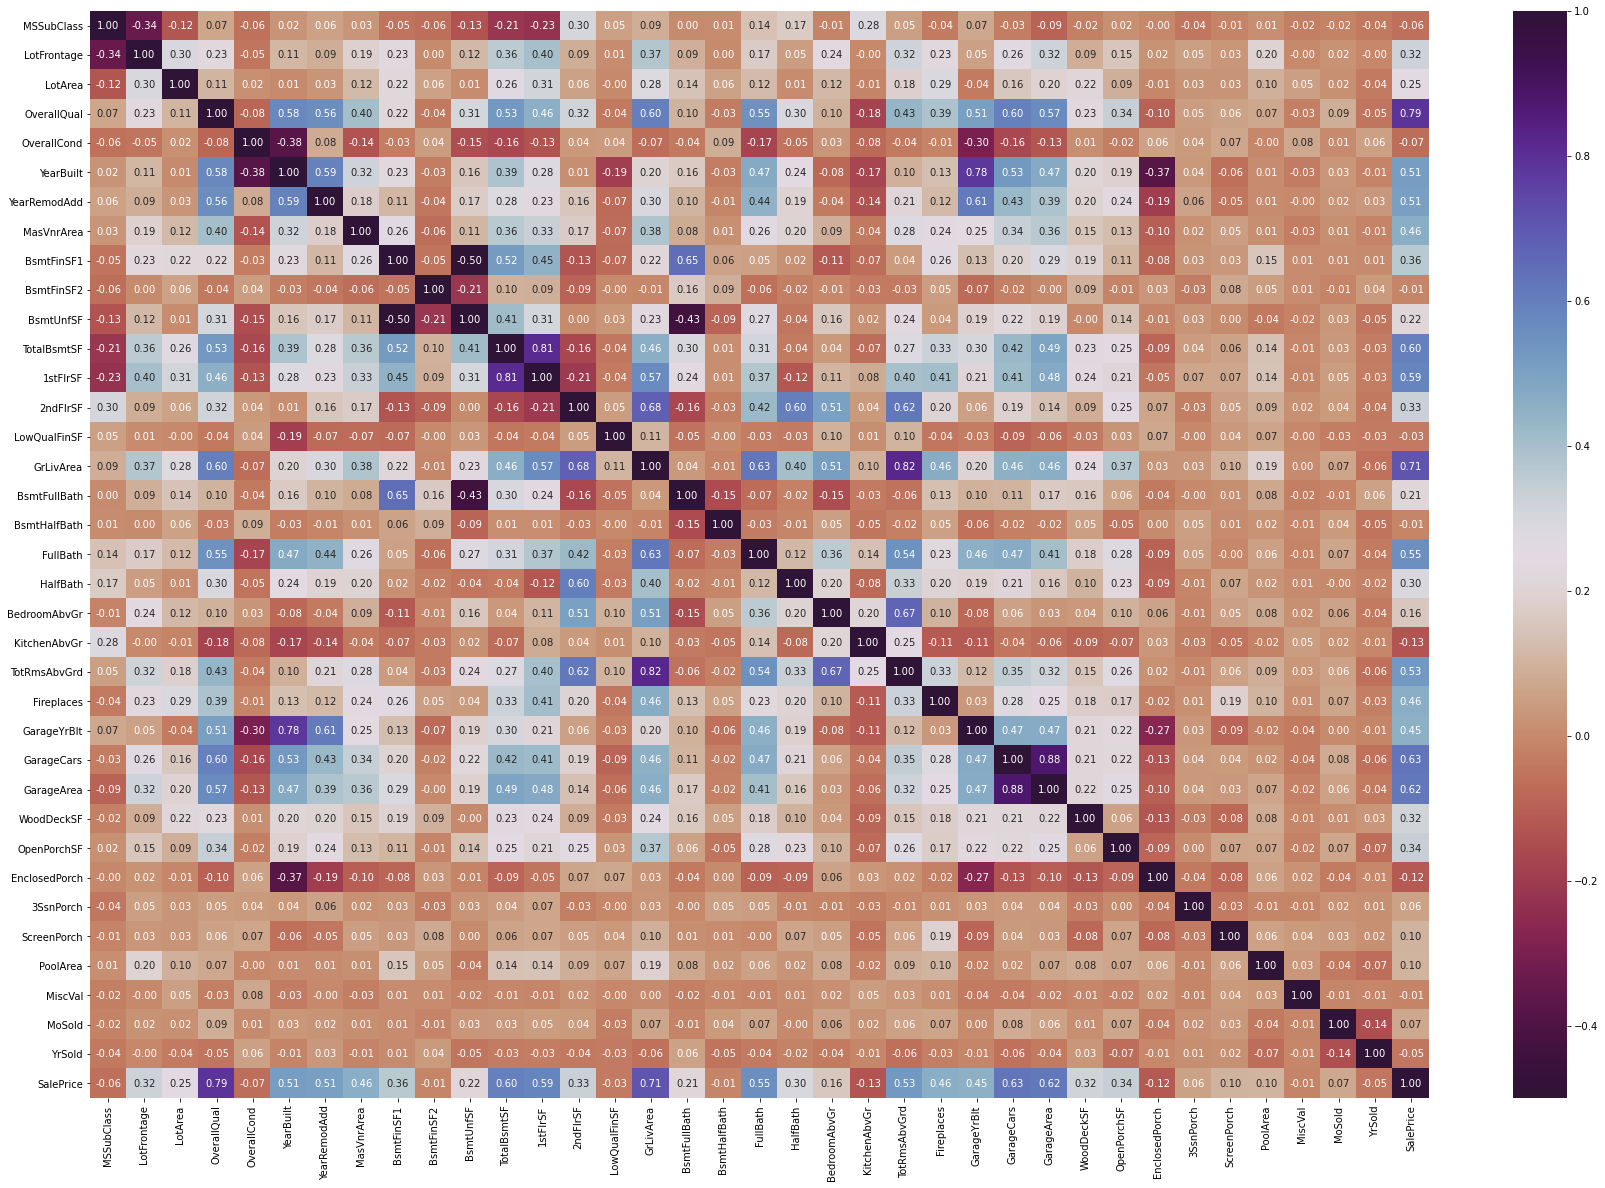

In [234]:
# Checking the correlation
plt.figure(figsize = (30,20))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', cmap = 'twilight_shifted_r')

<AxesSubplot:>

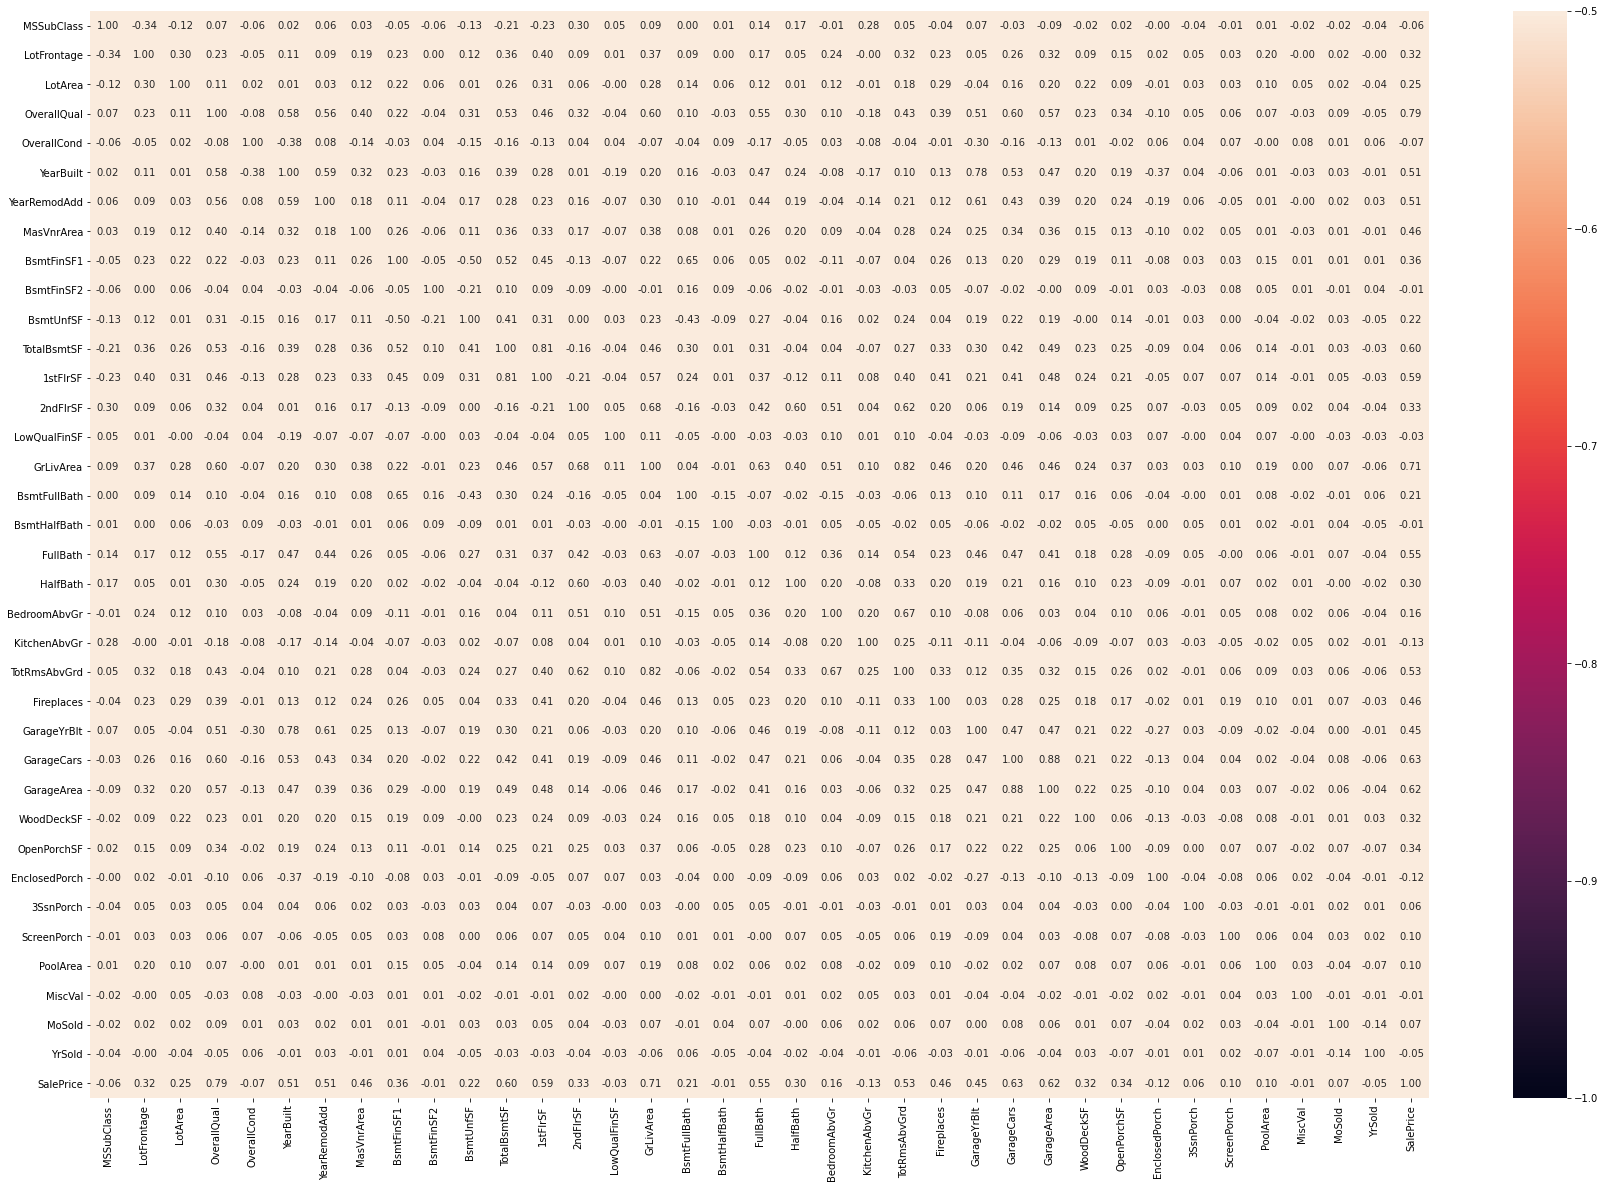

In [235]:
#Highlighting all the values lower than -0.5
#Plot to highlight high negative correlations.
plt.figure(figsize = (30,20))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = -1, vmax = -0.5)

    There are no columns with high negative correlation

<AxesSubplot:>

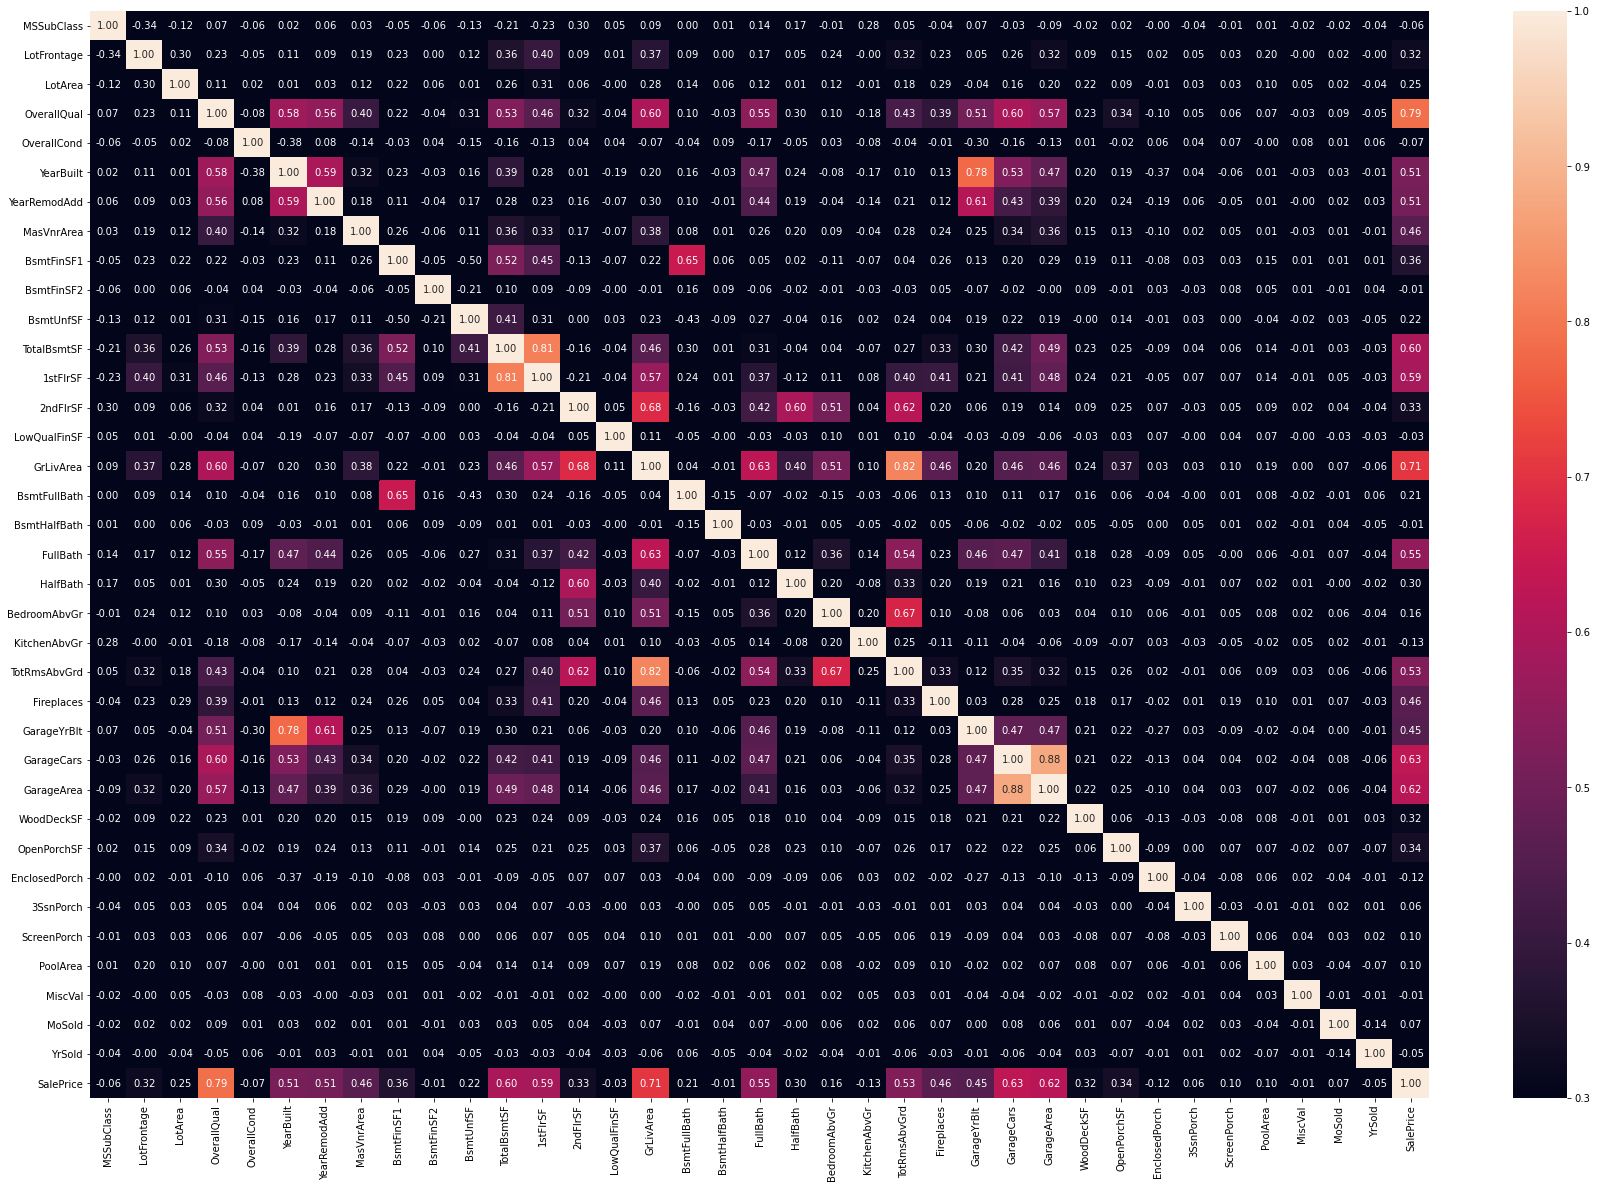

In [236]:
#Highlighting all the values greater than 0.3
#Plot to highlight high positive correlations.
plt.figure(figsize = (30,20))
sb.heatmap(df.corr(), annot = True, fmt = '0.2f', vmin = 0.3, vmax = 1)

    We can see that there are some particular columns which show high correlation with each other. I'll list some of those below.
    
    SalePrice vs OverallQual
    SalePrice vs TotalBsmtSF
    SalePrice vs GrLivArea
    SalePrice vs GarageCars
    SalePrice vs GarageArea
    
    GarageYrBlt vs YearBuilt
    TotRmsAbvGrd vs 2ndFlrSF
    TotRmsAbvGrd vs GrLivArea
    GrLivArea vs 2ndFlrSF
    FullBath vs GrLivArea

## Removing unwanted columns

In [237]:
# Removing columns with less correlation/that doesn't contribute to the model building
cols_to_remove = ['MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 
                  'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                  '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition']
for i in cols_to_remove:
    df.drop(i, axis = 1, inplace = True)
df.shape

(1168, 58)

## Handling outliers

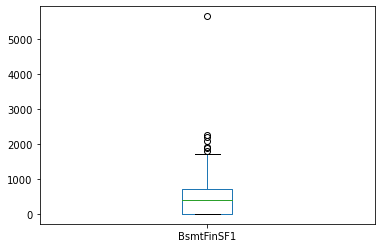

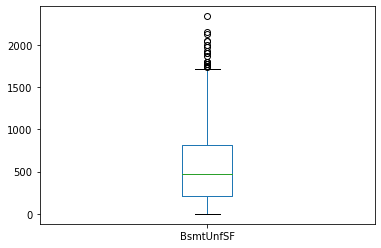

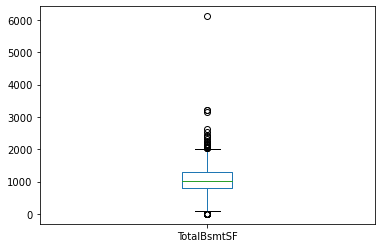

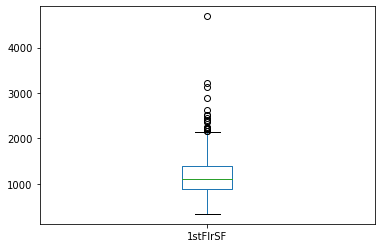

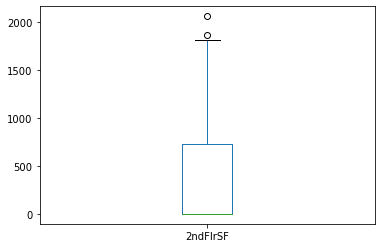

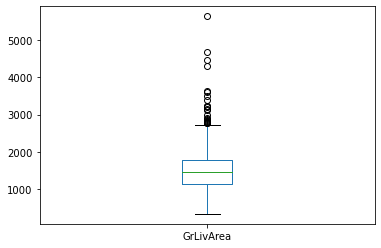

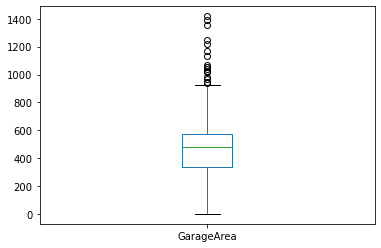

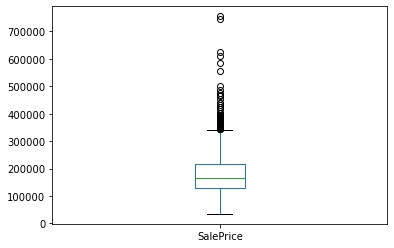

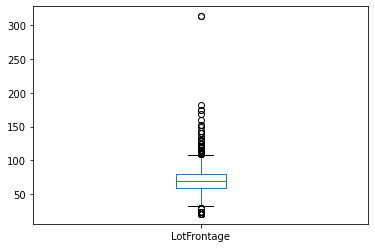

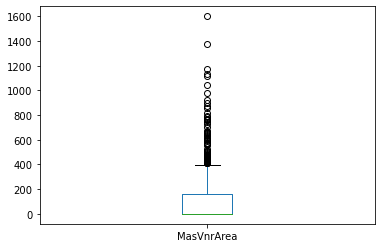

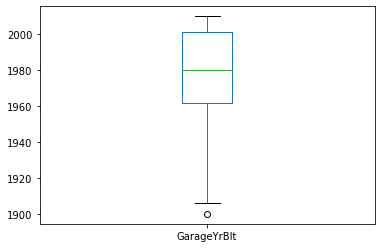

In [238]:
#  Now that the null values has been removed and correlation plotted, we can move to checking the Outliers. 
outlier_cols = ['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                'GrLivArea', 'GarageArea', 'SalePrice', 'LotFrontage', 
                'MasVnrArea', 'GarageYrBlt']
for i in outlier_cols:
    df[i].plot.box()
    plt.show()

    We can see that there outliers in almost all of the columns listed above. 

In [239]:
from scipy.stats import zscore

In [240]:
z = np.abs(zscore(df[outlier_cols]))
threshold = 3
print(np.where(z>3))

(array([  40,   68,   78,  103,  103,  140,  141,  141,  141,  141,  141,
        141,  141,  142,  191,  192,  192,  195,  232,  232,  232,  232,
        241,  241,  241,  241,  243,  273,  300,  303,  305,  305,  305,
        305,  305,  338,  352,  355,  361,  361,  361,  361,  361,  369,
        394,  403,  423,  434,  452,  504,  504,  504,  504,  523,  525,
        561,  561,  574,  592,  592,  592,  592,  592,  592,  592,  608,
        614,  626,  681,  691,  691,  691,  691,  691,  691,  697,  697,
        720,  736,  757,  757,  758,  762,  762,  762,  762,  772,  772,
        800,  821,  821,  839,  839,  839,  839,  858,  858,  861,  863,
        864,  870,  897,  897,  914,  914,  914,  914,  980, 1032, 1046,
       1047, 1053, 1094, 1120, 1120, 1142, 1150], dtype=int64), array([ 8,  3,  7,  5,  7,  9,  0,  2,  3,  4,  5,  7,  8,  9,  8,  4,  5,
        8,  1,  5,  7,  9,  0,  3,  7,  9,  2,  5,  7,  8,  1,  2,  3,  5,
        7,  9,  9,  9,  0,  2,  3,  5,  9,  7,  7, 10, 

In [241]:
df_new = df[(z<3).all(axis = 1)]
df_new

MSZoning  LotFrontage Street LotShape LandContour Utilities LotConfig  \
0          RL         70.0   Pave      IR1         Lvl    AllPub    Inside   
1          RL         95.0   Pave      IR1         Lvl    AllPub    Inside   
2          RL         92.0   Pave      IR1         Lvl    AllPub   CulDSac   
3          RL        105.0   Pave      IR1         Lvl    AllPub    Inside   
4          RL         70.0   Pave      IR1         Lvl    AllPub       FR2   
...       ...          ...    ...      ...         ...       ...       ...   
1163       RL         70.0   Pave      IR1         Lvl    AllPub    Inside   
1164       RL         67.0   Pave      Reg         Lvl    AllPub    Inside   
1165       RL         24.0   Pave      Reg         Lvl    AllPub       FR2   
1166  C (all)         50.0   Pave      Reg         Lvl    AllPub    Inside   
1167       RL         70.0   Pave      IR1         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0          Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1          Mod        NAmes       Norm       Norm     1Fam     1Story   
2          Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3          Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4          Gtl       NWAmes       Norm       Norm     1Fam     1Story   
...        ...          ...        ...        ...      ...        ...   
1163       Gtl       Sawyer       Norm       Norm     1Fam     1Story   
1164       Gtl      Edwards      Feedr       Norm     1Fam     1Story   
1165       Gtl      NPkVill       Norm       Norm    Twnhs     2Story   
1166       Gtl       IDOTRR      Feedr       Norm     1Fam     2Story   
1167       Gtl      Gilbert       Norm       Norm     1Fam     2Story   

      OverallQual  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0               6       1976          1976     Gable  CompShg     Plywood   
1               8       1970          1970      Flat  Tar&Grv     Wd Sdng   
2               7       1996          1997     Gable  CompShg     MetalSd   
3               6       1977          1977       Hip  CompShg     Plywood   
4               6       1977          2000     Gable  CompShg     CemntBd   
...           ...        ...           ...       ...      ...         ...   
1163            5       1967          1967     Gable  CompShg     MetalSd   
1164            4       1949          2003     Gable  CompShg     VinylSd   
1165            6       1976          1976     Gable  CompShg     Plywood   
1166            4       1920          1950   Gambrel  CompShg     BrkFace   
1167            6       2002          2003     Gable  CompShg     VinylSd   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
0        Plywood       None         0.0        TA        TA     CBlock   
1        Wd Sdng       None         0.0        Gd        Gd      PConc   
2        MetalSd       None         0.0        Gd        TA      PConc   
3        Plywood    BrkFace       480.0        TA        TA     CBlock   
4        CmentBd      Stone       126.0        Gd        TA     CBlock   
...          ...        ...         ...       ...       ...        ...   
1163     MetalSd    BrkFace        31.0        TA        Gd     CBlock   
1164     VinylSd       None         0.0        TA        TA     CBlock   
1165     Brk Cmn       None         0.0        TA        TA     CBlock   
1166     BrkFace       None         0.0        TA        Fa     BrkTil   
1167     VinylSd       None         0.0        Gd        TA      PConc   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0          Gd       TA           No          ALQ         120          Unf   
1          TA       Gd           Gd          ALQ         351          Rec   
2          Gd       TA           Av          GLQ         862          Unf   
3          Gd       TA           No          BLQ         705         

In [242]:
df_new.shape

(1104, 58)

In [243]:
df.shape

(1168, 58)

In [244]:
#Finding the percentage of dataloss
loss = ((1168-1104)/1168)*100
loss

5.47945205479452

    Since the dataloss is low, we can remove the outliers. 

In [245]:
df = df_new

## Handling Skewness

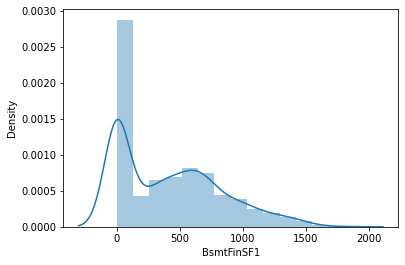

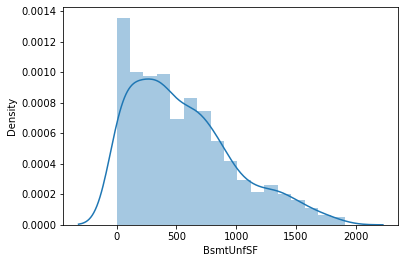

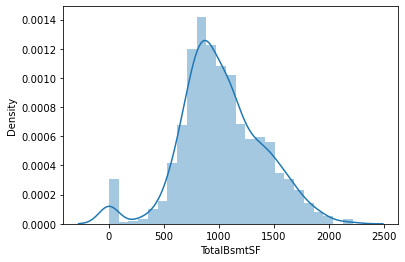

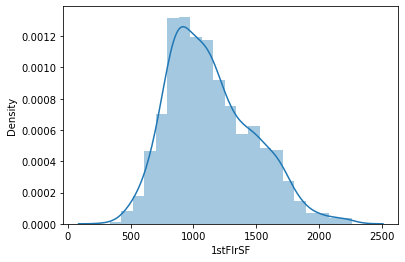

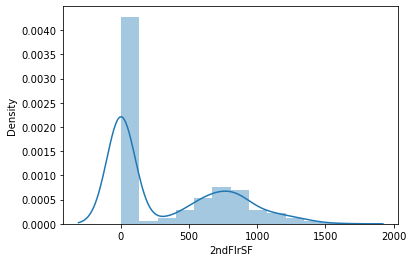

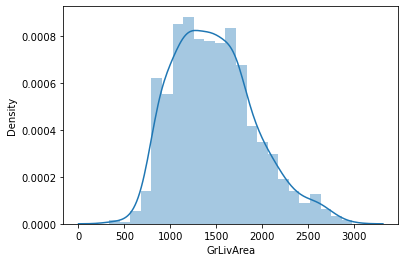

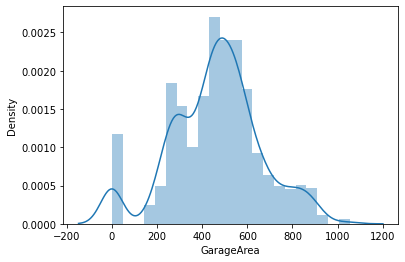

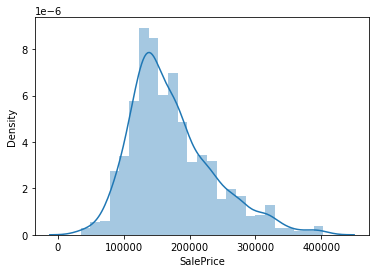

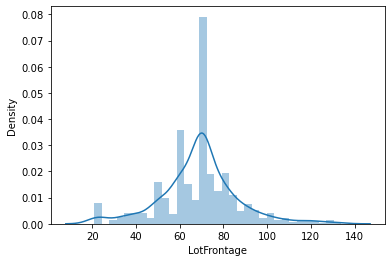

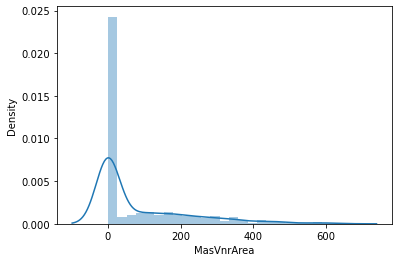

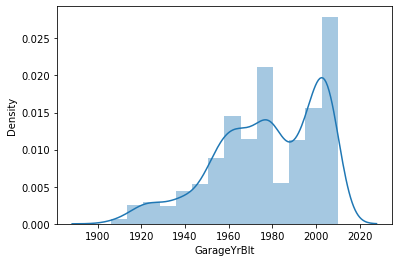

In [246]:
# Checking the skewness
for i in outlier_cols: 
    sb.distplot(df[i], kde = True)
    plt.show()

In [247]:
df[outlier_cols].skew()

BsmtFinSF1     0.661174
BsmtUnfSF      0.789864
TotalBsmtSF    0.013866
1stFlrSF       0.581479
2ndFlrSF       0.755054
GrLivArea      0.553933
GarageArea    -0.139969
SalePrice      0.915983
LotFrontage    0.140291
MasVnrArea     1.725978
GarageYrBlt   -0.621236
dtype: float64

In [248]:
from sklearn.preprocessing import PowerTransformer

In [249]:
pt = PowerTransformer(method='yeo-johnson')

In [250]:
to_rem_skew = ['BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 
                'GrLivArea', 'SalePrice', 'MasVnrArea', 'GarageYrBlt']
df[to_rem_skew] = pt.fit_transform(df[to_rem_skew])

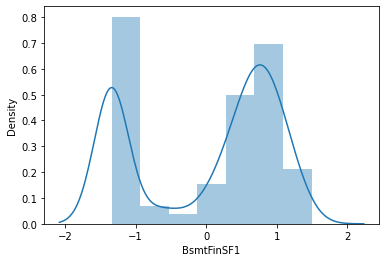

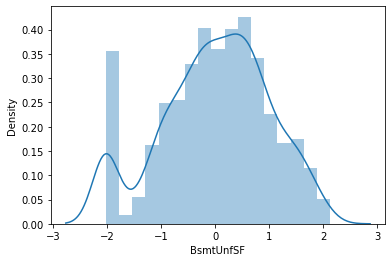

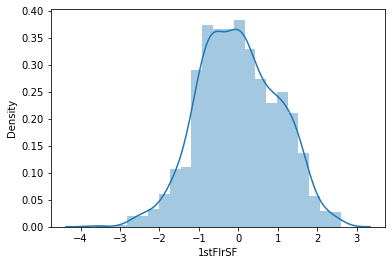

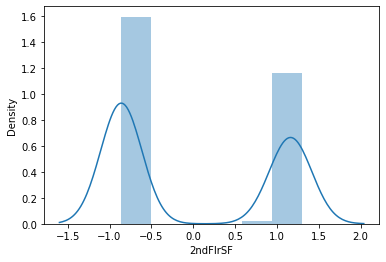

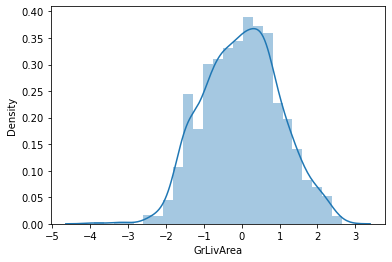

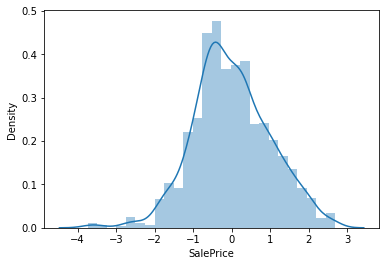

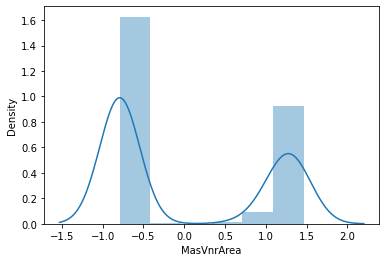

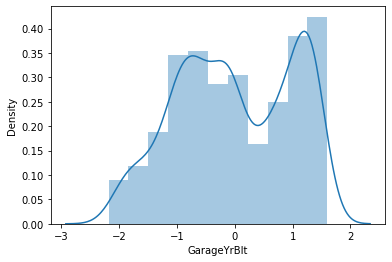

In [251]:
for i in to_rem_skew: 
    sb.distplot(df[i], kde = True)
    plt.show()

In [252]:
df[to_rem_skew].skew()

BsmtFinSF1    -0.412502
BsmtUnfSF     -0.316656
1stFlrSF      -0.004546
2ndFlrSF       0.306729
GrLivArea     -0.006182
SalePrice      0.009089
MasVnrArea     0.488231
GarageYrBlt   -0.121158
dtype: float64

## Encoding

In [253]:
# Now that the skewness is removed, we can encode the object values
object_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
               'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
               'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
               'PavedDrive']

In [254]:
from sklearn.preprocessing import LabelEncoder

In [255]:
le = LabelEncoder()

In [256]:
for i in object_cols:
    df[i] = le.fit_transform(df[i])

In [257]:
df.head()

MSZoning  LotFrontage  Street  LotShape  LandContour  Utilities  LotConfig  \
0         3         70.0       1         0            3          0          4   
1         3         95.0       1         0            3          0          4   
2         3         92.0       1         0            3          0          1   
3         3        105.0       1         0            3          0          4   
4         3         70.0       1         0            3          0          2   

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0          0            13           2           2         4           2   
1          1            12           2           2         0           2   
2          0            15           2           2         0           5   
3          0            14           2           2         0           2   
4          0            14           2           2         0           2   

   OverallQual  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0            6       1976          1976          1         0            8   
1            8       1970          1970          0         4           12   
2            7       1996          1997          1         0            7   
3            6       1977          1977          3         0            8   
4            6       1977          2000          1         0            4   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0            9           2   -0.792121          3          4           1   
1           13           2   -0.792121          2          2           2   
2            7           2   -0.792121          2          4           2   
3            9           1    1.427233          3          4           1   
4            4           3    1.215035          2          4           1   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0         2         3             3             0   -0.093323             5   
1         3         1             1             0    0.421514             4   
2         2         3             0             2    0.960966             5   
3         2         3             3             1    0.830506             5   
4         2         3             3             0    1.216038             5   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.940488         1078        1          4           1           4   
1   1.066948         2217        1          0           1           4   
2  -0.492747         1117        1          0           1           4   
3   1.203413         1844        1          0           1           4   
4  -0.211399         1602        1          2           1           4   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0 -0.448318 -0.860145  -1.225809             0         2         0   
1  2.532594 -0.860145   1.526696             1         2         0   
2  0.096264  1.195209   1.177479             1         2         1   
3  1.841355 -0.860145   0.868013             0         2         0   
4  1.327797 -0.860145   0.386531             0         2         0   

   BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             2            3             5           6           1   
1             4            2             8           6           1   
2             3            3             8           6           1   
3             3            3             7           6           1   
4             3            2             8           6           1   

   GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
0           1    -0.181527             1           2         440           4   
1           1    -0.471325             2           2         621           4   
2           1     0.807270             2           2         455           4   
3           1    -0.181527             1           2         54

## Scaling

In [258]:
# Here, skewness has been removed, and encoding is done
# Now proceeding to standardize the data 
from sklearn.preprocessing import StandardScaler

In [259]:
ss = StandardScaler()

In [260]:
col = df.columns

In [261]:
df = ss.fit_transform(df)

In [262]:
df = pd.DataFrame(df, columns = col)
df.head()

MSZoning  LotFrontage  Street  LotShape  LandContour  Utilities  LotConfig  \
0 -0.040672     0.065364  0.0522 -1.390703      0.31149        0.0   0.600133   
1 -0.040672     1.472585  0.0522 -1.390703      0.31149        0.0   0.600133   
2 -0.040672     1.303719  0.0522 -1.390703      0.31149        0.0  -1.240276   
3 -0.040672     2.035473  0.0522 -1.390703      0.31149        0.0   0.600133   
4 -0.040672     0.065364  0.0522 -1.390703      0.31149        0.0  -0.626806   

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0  -0.222614      0.168769   -0.035161         0.0  2.937813   -0.531145   
1   3.288328      0.003150   -0.035161         0.0 -0.410157   -0.531145   
2  -0.222614      0.500006   -0.035161         0.0 -0.410157    1.038126   
3  -0.222614      0.334388   -0.035161         0.0 -0.410157   -0.531145   
4  -0.222614      0.334388   -0.035161         0.0 -0.410157   -0.531145   

   OverallQual  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0    -0.004171   0.195514     -0.388646  -0.452501 -0.119355    -0.206770   
1     1.530917  -0.005461     -0.676158  -1.698288  7.410256     1.082914   
2     0.763373   0.865431      0.617649  -0.452501 -0.119355    -0.529191   
3    -0.004171   0.229010     -0.340727   2.039074 -0.119355    -0.206770   
4    -0.004171   0.229010      0.761405  -0.452501 -0.119355    -1.496453   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0    -0.103162    0.403827   -0.792121   0.666055   0.372137   -0.531898   
1     1.050161    0.403827   -0.792121  -0.935960  -2.287017    0.886497   
2    -0.679823    0.403827   -0.792121  -0.935960   0.372137    0.886497   
3    -0.103162   -1.259699    1.427233   0.666055   0.372137   -0.531898   
4    -1.544815    2.067353    1.215035  -0.935960   0.372137   -0.531898   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0 -0.415266  0.293721      0.614385     -1.516025   -0.093323      0.315320   
1  0.830533 -2.667632     -1.142820     -1.516025    0.421514     -0.749247   
2 -0.415266  0.293721     -2.021422     -0.435527    0.960966      0.315320   
3 -0.415266  0.293721      0.614385     -0.975776    0.830506      0.315320   
4 -0.415266  0.293721      0.614385     -1.516025    1.216038      0.315320   

   BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  Electrical  \
0   0.940488     0.144754 -0.116436   1.356868    0.271901    0.304857   
1   1.066948     3.190786 -0.116436  -0.922298    0.271901    0.304857   
2  -0.492747     0.249052 -0.116436  -0.922298    0.271901    0.304857   
3   1.203413     2.193271 -0.116436  -0.922298    0.271901    0.304857   
4  -0.211399     1.546089 -0.116436   0.217285    0.271901    0.304857   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0 -0.448318 -0.860145  -1.225809     -0.804235  0.862256 -0.746291   
1  2.532594 -0.860145   1.526696      1.125929  0.862256 -0.746291   
2  0.096264  1.195209   1.177479      1.125929  0.862256  1.243819   
3  1.841355 -0.860145   0.868013     -0.804235  0.862256 -0.746291   
4  1.327797 -0.860145   0.386531     -0.804235  0.862256 -0.746291   

   BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0     -1.089537     0.799758     -0.953380    0.267674    0.641643   
1      1.416398    -0.494865      1.048900    0.267674    0.641643   
2      0.163431     0.799758      1.048900    0.267674    0.641643   
3      0.163431     0.799758      0.381473    0.267674    0.641643   
4      0.163431    -0.494865      1.048900    0.267674    0.641643   

   GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
0   -0.700421    -0.181527     -0.334104    0.370343   -0.109451    0.219867   
1   -0.700421    -0.471325      0.916238    0.370343    0.798583    0.219867   
2   -0.700421     0.807270      0.916238    0.370343   -0.034199    0.219867   
3   -0.700421    -0.181527     -0.334104    0.370343    0

## Modeling

In [263]:
x = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [265]:
#Creating instances for each model
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
eln = ElasticNet()

In [266]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)

In [267]:
x_train.shape

(772, 57)

In [268]:
y_train.shape

(772,)

In [269]:
x_test.shape

(332, 57)

In [270]:
y_test.shape

(332,)

In [271]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model:
    print(m)
    m.fit(x_train, y_train)
    a = m.score(x_train, y_train)
    pred_test = m.predict(x_test)
    pred_train = m.predict(x_train)
    print('Score: ', a)
    print('Mean absolute error: ', mean_absolute_error(y_test,pred_test))
    print('Mean squared error: ', mean_squared_error(y_test,pred_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test)))
    print('R2 Score: ', r2_score(y_test,pred_test))
    print('\n\n')

LinearRegression()
Score:  0.8898765303748322
Mean absolute error:  0.23293792832144553
Mean squared error:  0.10030691434018928
Root mean squared error:  0.3167126684239032
R2 Score:  0.8920413117168445



KNeighborsRegressor()
Score:  0.8367319354397366
Mean absolute error:  0.31779520278997403
Mean squared error:  0.17612108639281365
Root mean squared error:  0.4196678286369038
R2 Score:  0.810443760621651



DecisionTreeRegressor()
Score:  1.0
Mean absolute error:  0.4077733130984399
Mean squared error:  0.3459786687417645
Root mean squared error:  0.5881995144011635
R2 Score:  0.627628828012428



SVR()
Score:  0.9475707946085847
Mean absolute error:  0.25806412264525186
Mean squared error:  0.13595911245300618
Root mean squared error:  0.3687263381601675
R2 Score:  0.8536694350821271



RandomForestRegressor()
Score:  0.9772334025940722
Mean absolute error:  0.2501206535779157
Mean squared error:  0.11548927652910947
Root mean squared error:  0.3398371323577067
R2 Score:  0.87570

## Cross Validation

In [272]:
from sklearn.model_selection import cross_val_score

In [273]:
model = [lr, knr, dtr, svr, rfr, ls, rd, eln]
for m in model: 
    print (m)
    i=[]
    for j in range (2,10):
        score = cross_val_score(m, x, y, cv = j)
        cv_mean = score.mean()
        i.append(cv_mean)
        a = i.index(max(i))+2
        b = max(i)
    print(f'At cross fold {a} the cv score is {b}')
    print('\n')

LinearRegression()
At cross fold 6 the cv score is 0.8683338830624056


KNeighborsRegressor()
At cross fold 7 the cv score is 0.7782363492738276


DecisionTreeRegressor()
At cross fold 6 the cv score is 0.6957441854493518


SVR()
At cross fold 7 the cv score is 0.8157588264056602


RandomForestRegressor()
At cross fold 7 the cv score is 0.856395328704717


Lasso()
At cross fold 3 the cv score is -0.003118349717608826


Ridge()
At cross fold 6 the cv score is 0.8684059213054311


ElasticNet()
At cross fold 9 the cv score is 0.3375681223207648




    Checking for the high R2 Score and the smallest difference when compared with CV Score, the best model turned out to be Ridge Regressor at CV Fold 6.

## Re-running the best model

In [274]:
rd.fit(x_train, y_train)
a = rd.score(x_train, y_train)
pred_test_rd = rd.predict(x_test)
pred_train_rd = rd.predict(x_train)
print('Score: ', a)
print('Mean absolute error: ', mean_absolute_error(y_test,pred_test_rd))
print('Mean squared error: ', mean_squared_error(y_test,pred_test_rd))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test_rd)))
print('R2 Score: ', r2_score(y_test,pred_test_rd))

Score:  0.8898740326420366
Mean absolute error:  0.23283784490425816
Mean squared error:  0.10021096184895917
Root mean squared error:  0.31656115025214193
R2 Score:  0.8921445838108856


## Grid Search CV

In [275]:
from sklearn.model_selection import GridSearchCV
import sklearn

In [276]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.1.


In [277]:
parameters = {'alpha': [10,4,2,1.0,0.5,0.2,0.1], "fit_intercept": [True, False], }
rd = Ridge()
ridgegscv = GridSearchCV(ls, parameters, cv = 4, n_jobs = -1, verbose = 2)
ridgegscv.fit(x_train, y_train)

print(ridgegscv.best_params_)

Fitting 4 folds for each of 14 candidates, totalling 56 fits
{'alpha': 0.1, 'fit_intercept': False}


In [278]:
ridgecv = Ridge(alpha = 0.1, fit_intercept = False)
ridgecv.fit(x_train, y_train)
ridgecv.score(x_train, y_train)
pred_ridgecv = ridgecv.predict(x_test)

rdcv = r2_score(y_test, pred_ridgecv)
rdcv

0.892088057589035

    We're getting an accuracy of 89.2%

## Plotting the model fit

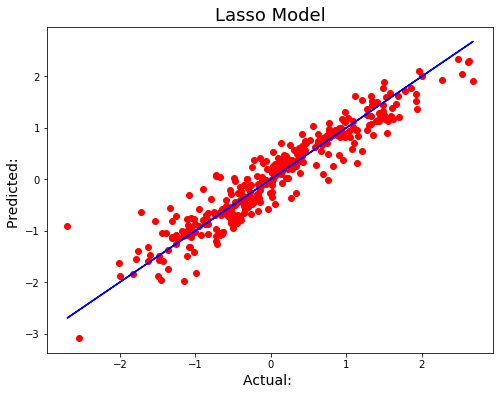

In [279]:
plt.figure(figsize = (8,6))
plt.scatter(x = y_test, y = pred_ridgecv, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual: ', fontsize = 14)
plt.ylabel('Predicted: ', fontsize = 14)
plt.title('Lasso Model', fontsize = 18)
plt.show()

## Saving the model

In [280]:
import joblib
joblib.dump(ridgecv, 'Housing_Project.obj')

['Housing_Project.obj']

## Handling the test data

In [281]:
dft.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [282]:
# Checking if all the colums match in test and train datasets
check = []
for i in df_1.columns:
    if i not in dft.columns:
        check.append(i)
check

['SalePrice']

In [283]:
def checker(z):
    a = [x for x in df_1 if df_1[x].dtypes == z]
    b = [x for x in dft if dft[x].dtypes == z]

    la, lb = len(a), len(b)
    max_len = max(la, lb)
    
    if len(b)>len(a):
        for i in b:
            if i in a:
                print("Not Changed: ",i)
            else:
                print("Changed    : ",i)
    else:
        for i in a:
            if i in b:
                print("Not Changed: ",i)
            else:
                print("Changed    : ",i)   

In [284]:
checker('object')

Not Changed:  MSZoning
Not Changed:  Street
Not Changed:  Alley
Not Changed:  LotShape
Not Changed:  LandContour
Not Changed:  Utilities
Not Changed:  LotConfig
Not Changed:  LandSlope
Not Changed:  Neighborhood
Not Changed:  Condition1
Not Changed:  Condition2
Not Changed:  BldgType
Not Changed:  HouseStyle
Not Changed:  RoofStyle
Not Changed:  RoofMatl
Not Changed:  Exterior1st
Not Changed:  Exterior2nd
Not Changed:  MasVnrType
Not Changed:  ExterQual
Not Changed:  ExterCond
Not Changed:  Foundation
Not Changed:  BsmtQual
Not Changed:  BsmtCond
Not Changed:  BsmtExposure
Not Changed:  BsmtFinType1
Not Changed:  BsmtFinType2
Not Changed:  Heating
Not Changed:  HeatingQC
Not Changed:  CentralAir
Not Changed:  Electrical
Not Changed:  KitchenQual
Not Changed:  Functional
Not Changed:  FireplaceQu
Not Changed:  GarageType
Not Changed:  GarageFinish
Not Changed:  GarageQual
Not Changed:  GarageCond
Not Changed:  PavedDrive
Changed    :  PoolQC
Not Changed:  Fence
Not Changed:  MiscFeature

In [285]:
# We can see that PoolQC has changed its datatype in the test dataset
dft = dft.astype({"PoolQC": object})

In [286]:
checker('object')

Not Changed:  MSZoning
Not Changed:  Street
Not Changed:  Alley
Not Changed:  LotShape
Not Changed:  LandContour
Not Changed:  Utilities
Not Changed:  LotConfig
Not Changed:  LandSlope
Not Changed:  Neighborhood
Not Changed:  Condition1
Not Changed:  Condition2
Not Changed:  BldgType
Not Changed:  HouseStyle
Not Changed:  RoofStyle
Not Changed:  RoofMatl
Not Changed:  Exterior1st
Not Changed:  Exterior2nd
Not Changed:  MasVnrType
Not Changed:  ExterQual
Not Changed:  ExterCond
Not Changed:  Foundation
Not Changed:  BsmtQual
Not Changed:  BsmtCond
Not Changed:  BsmtExposure
Not Changed:  BsmtFinType1
Not Changed:  BsmtFinType2
Not Changed:  Heating
Not Changed:  HeatingQC
Not Changed:  CentralAir
Not Changed:  Electrical
Not Changed:  KitchenQual
Not Changed:  Functional
Not Changed:  FireplaceQu
Not Changed:  GarageType
Not Changed:  GarageFinish
Not Changed:  GarageQual
Not Changed:  GarageCond
Not Changed:  PavedDrive
Not Changed:  PoolQC
Not Changed:  Fence
Not Changed:  MiscFeature

In [287]:
print(' Shape: ', dft.shape, '\n', dft.columns)

 Shape:  (292, 80) 
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Gar

In [288]:
# Now that that has been normalized, we can proceed with the EDA
dft_drop = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence','MiscFeature', 'MSSubClass', 'LotArea', 
           'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 
           'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 
           'SaleType', 'SaleCondition']
for i in dft_drop: 
    dft.drop(i, axis = 1, inplace = True)
print(' Shape: ', dft.shape, '\n', dft.columns)

 Shape:  (292, 57) 
 Index(['MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'YrSold'],
      dtype='object')


In [289]:
# Imputing the null values
float_col_with_null_test = [x for x in dft if dft[x].dtype == 'float64' and dft[x].isnull().sum()]
float_col_with_null_test

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

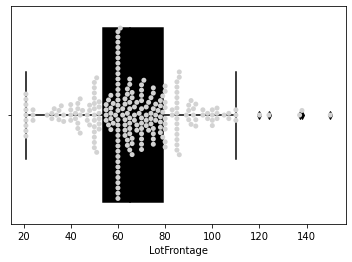

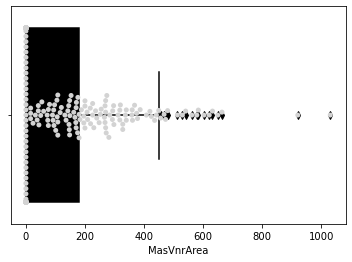

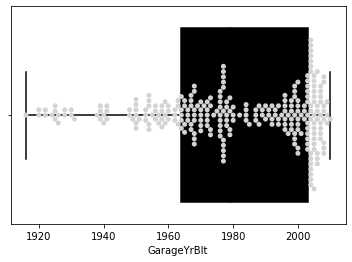

In [290]:
# Checking the outliers in the 3 columns listed above to decide if mean or median should be used to substitute NaN
for i in float_col_with_null_test:
    ax = sb.boxplot(dft[i], data = dft, color = 'black')
    ax = sb.swarmplot(dft[i], data = dft, color = 'lightgray')
    plt.show()

In [291]:
# Since all three columns has skewness, I'm opting to use median to fill in the null values for these columns. 
dft['LotFrontage'] = dft['LotFrontage'].fillna(dft['LotFrontage'].median())
dft['MasVnrArea'] = dft['MasVnrArea'].fillna(dft['MasVnrArea'].median())
dft['GarageYrBlt'] = dft['GarageYrBlt'].fillna(dft['GarageYrBlt'].median())

In [292]:
object_col_with_null_dft = [x for x in dft if dft[x].dtype == 'object' and dft[x].isnull().sum()]
object_col_with_null_dft

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [293]:
# Checked and confirmed that all the columns listed above are categorical & hence using mode
for i in object_col_with_null_dft:
    dft[i] = dft[i].fillna(dft[i].mode()[0])

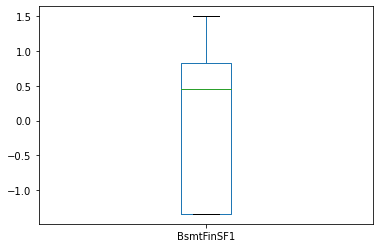

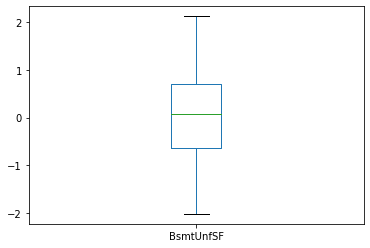

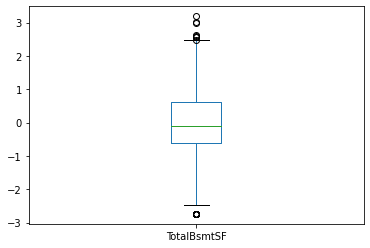

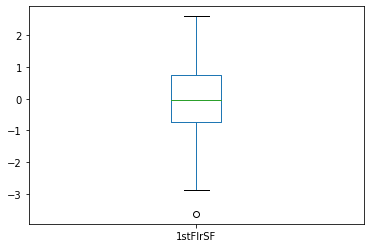

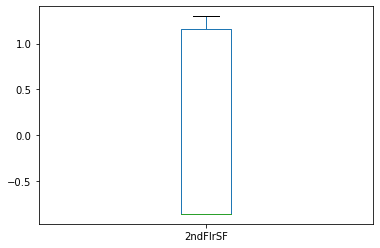

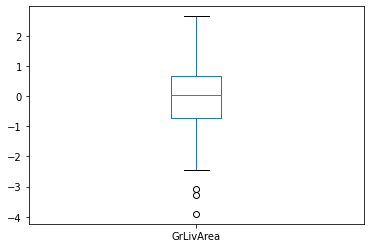

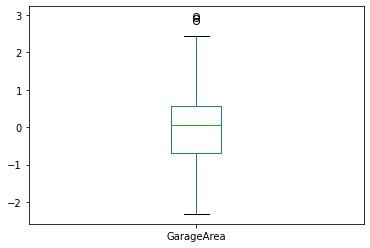

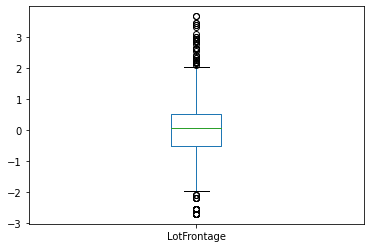

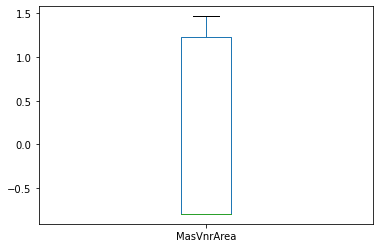

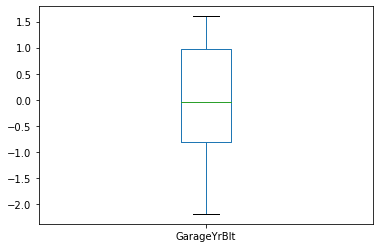

In [294]:
#  Now that the null values has been removed and correlation plotted, we can move to checking the Outliers. 
outlier_cols_dft = ['BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                'GrLivArea', 'GarageArea', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for i in outlier_cols_dft:
    df[i].plot.box()
    plt.show()

In [295]:
z = np.abs(zscore(dft[outlier_cols_dft]))
threshold = 3
print(np.where(z>3))

(array([ 14,  32,  54,  83,  85,  87, 141, 143, 157, 157, 175, 184, 184,
       184, 235, 242, 273], dtype=int64), array([1, 1, 8, 8, 5, 5, 5, 8, 5, 7, 8, 0, 2, 3, 7, 5, 7], dtype=int64))


In [296]:
df_new_test = dft[(z<3).all(axis = 1)]
df_new_test

MSZoning  LotFrontage Street LotShape LandContour Utilities LotConfig  \
0         RL         86.0   Pave      IR1         HLS    AllPub    Corner   
1         RL         65.0   Pave      IR1         Lvl    AllPub   CulDSac   
2         RL         65.0   Pave      Reg         Lvl    AllPub    Inside   
3         RL         75.0   Pave      Reg         Bnk    AllPub    Inside   
4         RL         86.0   Pave      IR1         Lvl    AllPub   CulDSac   
..       ...          ...    ...      ...         ...       ...       ...   
287       RL         78.0   Pave      Reg         Lvl    AllPub    Inside   
288       RL         57.0   Pave      IR2         Lvl    AllPub    Inside   
289       RL         65.0   Pave      IR1         Lvl    AllPub   CulDSac   
290       RM         50.0   Pave      Reg         Lvl    AllPub    Corner   
291       RM         21.0   Pave      Reg         Lvl    AllPub    Inside   

    LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0         Gtl      StoneBr       Norm       Norm     1Fam     1Story   
1         Gtl      StoneBr       Norm       Norm   TwnhsE     1Story   
2         Gtl      CollgCr       Norm       Norm     1Fam     1Story   
3         Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4         Gtl      Somerst      Feedr       Norm     1Fam     2Story   
..        ...          ...        ...        ...      ...        ...   
287       Gtl      Somerst       Norm       Norm     1Fam     1Story   
288       Gtl      CollgCr       Norm       Norm     1Fam     1Story   
289       Gtl        NAmes       Norm       Norm     1Fam     1Story   
290       Gtl      BrkSide      Feedr       Norm     1Fam     1.5Fin   
291       Gtl       BrDale       Norm       Norm    Twnhs     2Story   

     OverallQual  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0              9       2005          2006       Hip  CompShg     VinylSd   
1              8       1984          1984     Gable  CompShg     HdBoard   
2              8       2001          2001       Hip  CompShg     VinylSd   
3              7       1941          1950     Gable  CompShg     MetalSd   
4              6       2007          2007     Gable  CompShg     VinylSd   
..           ...        ...           ...       ...      ...         ...   
287            8       2007          2007     Gable  CompShg     VinylSd   
288            5       1994          1995     Gable  CompShg     VinylSd   
289            6       1970          1970     Gable  CompShg     Wd Sdng   
290            6       1947          1950     Gable  CompShg     CemntBd   
291            6       1973          1973     Gable  CompShg     HdBoard   

    Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
0       VinylSd      Stone       200.0        Gd        TA      PConc   
1       HdBoard       None         0.0        Gd        TA     CBlock   
2       VinylSd       None         0.0        Gd        TA      PConc   
3       MetalSd       None         0.0        TA        TA     CBlock   
4       VinylSd      Stone        74.0        Gd        TA      PConc   
..          ...        ...         ...       ...       ...        ...   
287     VinylSd      Stone       468.0        TA        TA      PConc   
288     VinylSd       None         0.0        TA        TA      PConc   
289     Wd Sdng    BrkFace       180.0        TA        TA     CBlock   
290     CmentBd       None         0.0        TA        Gd     CBlock   
291     HdBoard    BrkFace       408.0        TA        TA     CBlock   

    BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0         Ex       TA           Gd          GLQ        1249          Unf   
1         Gd       TA           Av          GLQ        1036          Unf   
2         Gd       TA           Av          Unf           0          Unf   
3         TA       TA           No          Rec         275          Unf   
4         Gd       TA           Mn          

In [297]:
dft.shape

(292, 57)

In [298]:
df_new_test.shape

(278, 57)

In [299]:
#Finding the percentage of dataloss
loss = ((292-278)/292)*100
loss

4.794520547945205

    Since the data loss is only 4.7%, we can remove those columns.

In [300]:
dft = df_new_test

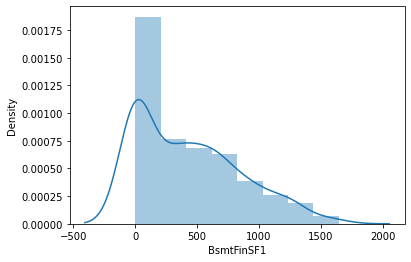

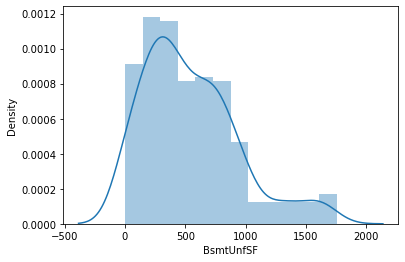

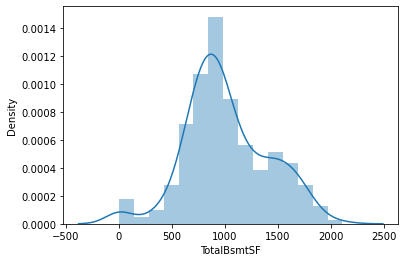

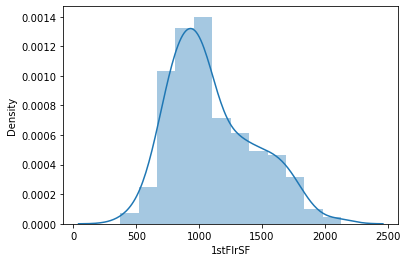

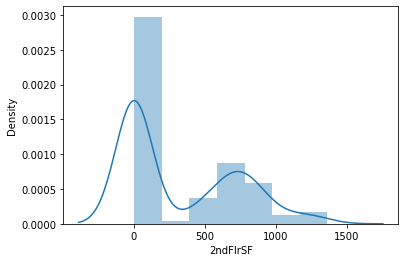

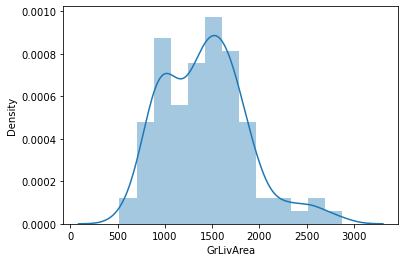

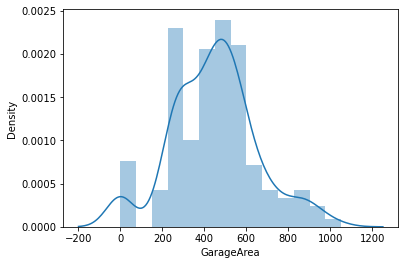

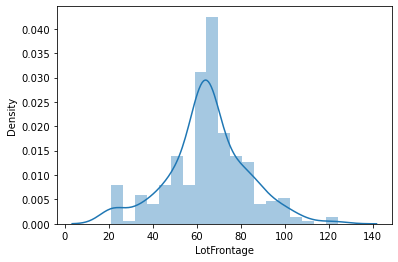

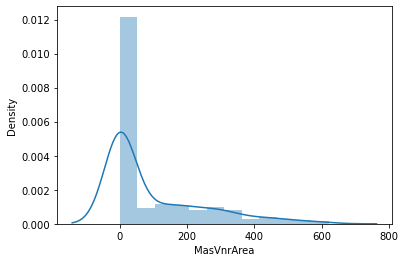

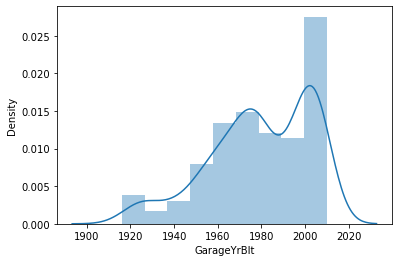

In [301]:
# Checking the skewness
for i in outlier_cols_dft: 
    sb.distplot(dft[i], kde = True)
    plt.show()

In [302]:
to_rem_skew_test = ['BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 
                'GrLivArea', 'MasVnrArea', 'GarageYrBlt']
dft[to_rem_skew_test] = pt.fit_transform(dft[to_rem_skew_test])

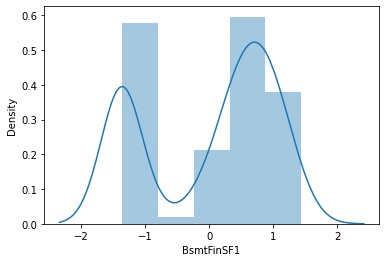

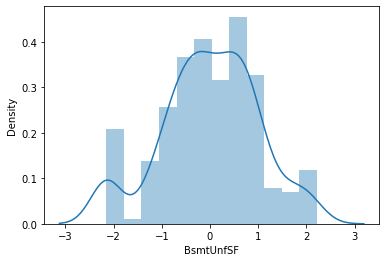

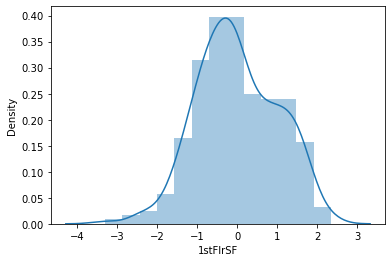

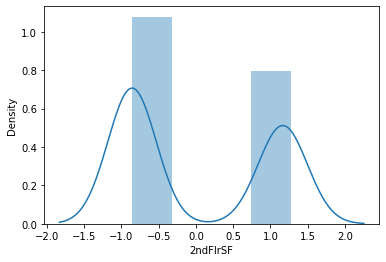

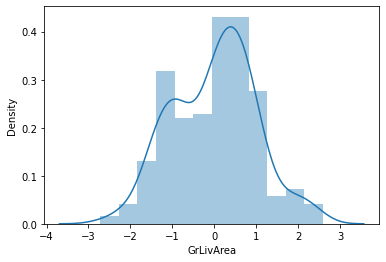

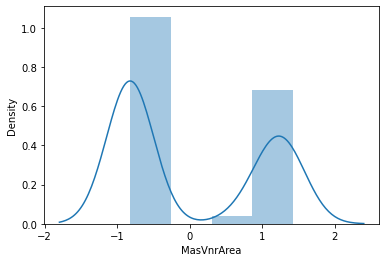

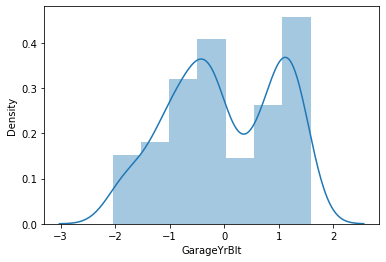

In [303]:
for i in to_rem_skew_test: 
    sb.distplot(dft[i], kde = True)
    plt.show()

In [304]:
dft[to_rem_skew_test].skew()

BsmtFinSF1    -0.445067
BsmtUnfSF     -0.255214
1stFlrSF      -0.001702
2ndFlrSF       0.312548
GrLivArea     -0.009167
MasVnrArea     0.417432
GarageYrBlt   -0.132194
dtype: float64

    The skewness has been succesfully removed.

In [305]:
object_cols_test = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
               'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
               'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
               'PavedDrive']

In [306]:
# Label Encoding
for i in object_cols_test:
    dft[i] = le.fit_transform(dft[i])

In [307]:
col_test = dft.columns

In [308]:
# Scaling
dft = ss.fit_transform(dft)

In [309]:
dft = pd.DataFrame(dft, columns = col_test)
dft.head()

MSZoning  LotFrontage    Street  LotShape  LandContour  Utilities  \
0 -0.294756     1.169090  0.085126 -1.428635    -2.678071  -0.060084   
1 -0.294756     0.009337  0.085126 -1.428635     0.282182  -0.060084   
2 -0.294756     0.009337  0.085126  0.725943     0.282182  -0.060084   
3 -0.294756     0.561600  0.085126  0.725943    -4.158198  -0.060084   
4 -0.294756     1.169090  0.085126 -1.428635     0.282182  -0.060084   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0  -2.043930  -0.212398      1.571592   -0.025328   -0.060084 -0.457986   
1  -1.386277  -0.212398      1.571592   -0.025328   -0.060084  2.647384   
2   0.586684  -0.212398     -1.268693   -0.025328   -0.060084 -0.457986   
3   0.586684  -0.212398     -1.101617   -0.025328   -0.060084 -0.457986   
4  -1.386277  -0.212398      1.404517   -1.198835   -0.060084 -0.457986   

   HouseStyle  OverallQual  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  \
0   -0.437034     2.292020   1.075697      1.050222   1.942590 -0.080728   
1   -0.437034     1.526177   0.385065     -0.037527  -0.495514 -0.080728   
2   -0.437034     1.526177   0.944148      0.803007   1.942590 -0.080728   
3    0.869369     0.760333  -1.029087     -1.718594  -0.495514 -0.080728   
4    0.869369    -0.005510   1.141472      1.099666  -0.495514 -0.080728   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     0.703648     0.747863    1.940026    1.236020  -0.974148   0.329471   
1    -1.054682    -1.229055    0.334885   -0.822392  -0.974148   0.329471   
2     0.703648     0.747863    0.334885   -0.822392  -0.974148   0.329471   
3    -0.615099    -0.570083    0.334885   -0.822392   0.628297   0.329471   
4     0.703648     0.747863    1.940026    1.022428  -0.974148   0.329471   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0    0.776282 -2.613767  0.224718     -1.236748     -0.378558    1.217958   
1   -0.508280 -0.328776  0.224718     -2.146314     -0.378558    1.077613   
2    0.776282 -0.328776  0.224718     -2.146314      1.283113   -1.368171   
3   -0.508280  0.813720  0.224718      0.582384      0.729223    0.248003   
4    0.776282 -0.328776  0.224718     -0.327182      1.283113   -1.368171   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  \
0      0.284307   0.488542     2.317621 -0.135333  -0.894830    0.255214   
1      0.284307  -0.834172     0.528087 -0.135333   0.626655    0.255214   
2      0.284307   2.213883     1.886807 -0.135333  -0.894830    0.255214   
3      0.284307  -0.072962    -0.787297 -0.135333  -0.894830    0.255214   
4      0.284307   0.915349    -0.302951 -0.135333  -0.894830    0.255214   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0    0.321175  1.995129 -0.858007   1.116301      1.156121  0.868134   
1    0.321175  0.836878 -0.858007  -0.031872      1.156121 -1.032191   
2    0.321175  1.751178 -0.858007   0.867547     -0.840163  0.868134   
3    0.321175 -0.662000  1.160644   0.419328     -0.840163 -1.032191   
4    0.321175 -0.536757  1.231095   1.136150     -0.840163  0.868134   

   HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0 -0.709923      0.282636    -0.538576      1.093935    0.214884    0.735578   
1 -0.709923     -2.211741    -0.538576     -1.445639    0.214884    0.735578   
2 -0.709923      0.282636    -3.097963      0.459042    0.214884    0.735578   
3  1.324702      0.282636    -1.818270      0.459042    0.214884    0.735578   
4  1.324702      1.529825    -0.538576      1.728829    0.214884    0.735578   

   GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
0   -0.663255     1.244089     -1.551754    1.783509    1.117216    0.222622   
1   -0.663255     0.053938     -0.308562    0.417626    0.573780    0.222622   
2   -0.663255     0.989086     -0.308562    0.417626    0.363259    0.222622   
3   -0.663255    -1.501830      0.934630   -0

## Re-importing the OBJ file

In [310]:
final = joblib.load('Housing_Project.obj')
final.predict(dft)

array([ 2.26398038e+00,  7.08610312e-01,  1.31484880e+00,  9.95695572e-02,
        7.45622204e-01, -1.73419596e+00, -5.03138475e-01,  1.84197042e+00,
        1.19315053e+00,  4.26972446e-02, -1.94594520e+00, -4.42224737e-01,
       -9.40961735e-01,  6.63090027e-01, -8.26603191e-01, -8.85869117e-01,
       -7.73003847e-01,  3.14832873e-01,  6.01015685e-01,  3.14168867e-02,
       -3.05017608e-01, -3.40811191e-01, -2.02889518e+00, -1.18709989e+00,
       -7.43323695e-01,  2.28763844e-01, -5.29777710e-01,  4.31474061e-02,
       -1.91454994e+00, -1.17823741e-01,  5.27878971e-01,  1.76378882e-01,
       -1.26965300e+00,  1.49936442e-01,  4.66529893e-01, -9.29712745e-01,
       -1.19210280e-01, -3.62198156e-01, -1.28466675e+00,  1.80291048e+00,
        7.55101663e-01,  4.29326346e-01, -3.36324861e-01, -5.65125020e-01,
       -7.45060933e-01, -1.53461744e+00,  6.26631893e-01,  2.18518569e+00,
       -4.33780202e-01,  9.30561348e-01, -1.42559414e+00, -1.75975641e+00,
       -7.14793053e-01, -